# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
np.random.seed(0)
from scipy import stats
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

# Load in Data

## Basic Stats 

In [2]:
bs89 = pd.read_csv('basic_stats_18_19.csv', index_col = 0)

In [3]:
bs89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP', 'G', 'A', 'PTS▼', '+/-', 'PIM',
       'PS', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'S%', 'TOI',
       'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%'],
      dtype='object')

In [4]:
# Drop duplicate columns from other datasets
bs89.drop(['PS'], axis = 1, inplace = True)

In [5]:
# Rename columns for easier understanding
bs89.rename(columns = {'PTS▼': 'PTS', 'EV': 'EVG', 'PP': 'PPG', 'SH': 'SHG', 
                       'EV.1': 'EVA', 'PP.1': 'PPA', 'SH.1': 'SHA'}, inplace = True)

## Advanced Stats 

In [6]:
as89 = pd.read_csv('advanced_stats_18_19.csv', index_col = 0)

In [7]:
as89.head()

,Player,Age,Tm,Pos,GP▼,CF,CA,CF%,CF% rel,FF,FA,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,E+/-,SAtt.,Thru%
Rk,,,,,,,,,,,,,,,,,,,,,,,,,
1,Marcus Pettersson\pettema01,22,TOT,D,84,1205,1190,50.3,3.5,889,889,50.0,2.9,8.1,93.7,101.8,49.9,50.1,16:41,14:56,24,43,5.5,221,39.4
2,Kevin Fiala\fialake01,22,TOT,LW,83,1165,1044,52.7,0.9,888,778,53.3,1.6,6.1,90.4,96.4,63.6,36.4,15:38,13:24,44,68,-3.2,316,55.1
3,Ryan Hartman\hartmry01,24,TOT,RW,83,973,952,50.5,-1.3,712,740,49.0,-3.4,8.9,91.5,100.3,44.5,55.5,13:07,12:23,35,38,-7.7,245,59.2
4,Sebastian Aho\ahose01,21,CAR,C,82,1556,1164,57.2,3.4,1191,872,57.7,4.2,10.0,90.7,100.7,59.2,40.8,20:09,16:03,81,64,21.7,466,52.1
5,Josh Anderson\anderjo05,24,CBJ,RW,82,1129,1136,49.8,-0.4,854,861,49.8,-1.7,10.6,93.4,103.9,46.4,53.6,17:01,14:19,46,19,5.3,383,60.1


In [8]:
as89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP▼', 'CF', 'CA', 'CF%', 'CF% rel', 'FF',
       'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%',
       'TOI/60', 'TOI(EV)', 'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%'],
      dtype='object')

In [9]:
# Drop duplicate columns from other datasets
as89.drop(['Age', 'Tm', 'Pos', 'GP▼', 'CF% rel'], axis = 1, inplace = True)

## Time On Ice Stats 

In [10]:
toi89 = pd.read_csv('TOI_18_19.csv', index_col = 0)

In [11]:
toi89.columns

Index(['Player', 'Tm', 'Pos', 'Shift', 'GP▼', 'Unnamed: 6', 'TOI', 'CF% Rel',
       'GF/60', 'GA/60', 'Unnamed: 11', 'TOI.1', 'CF% Rel.1', 'GF/60.1',
       'GA/60.1', 'Unnamed: 16', 'TOI.2', 'CF% Rel.2', 'GF/60.2', 'GA/60.2'],
      dtype='object')

In [12]:
# Drop duplicate columns from other datasets
toi89.drop(['Tm', 'Pos', 'GP▼', 'Unnamed: 6', 'Unnamed: 11', 'Unnamed: 16'], axis = 1, inplace = True)

In [13]:
# Rename columns for easier understanding
toi89.rename(columns = {'TOI': 'EV_TOI', 'CF% Rel': 'EV_CF%_Rel', 
                        'GF/60': 'EV_GFP60', 'GA/60': 'EV_GAP60', 
                        'TOI.1': 'PP_TOI', 'CF% Rel.1': 'PP_CF%_Rel',
                        'GF/60.1': 'PP_GFP60', 'GA/60.1': 'PP_GAP60',
                        'TOI.2': 'SH_TOI', 'CF% Rel.2': 'SH_CF%_Rel',
                        'GF/60.2': 'SH_GFP60', 'GA/60.2': 'SH_GAP60'}, inplace = True)

## Misc Stats

In [14]:
misc89 = pd.read_csv('misc_18_19.csv', index_col = 0)

In [15]:
misc89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP▼', 'GC', 'G', 'A', 'PTS', 'GC.1',
       'PIM', 'S', 'G.1', 'A.1', 'PTS.1', 'GC.2', 'TGF', 'PGF', 'TGA', 'PGA',
       '+/-', 'xGF', 'xGA', 'E+/-', 'OPS', 'DPS', 'PS', 'Att.', 'Made', 'Miss',
       'Pct.'],
      dtype='object')

In [16]:
# Drop duplicate columns from other datasets
misc89.drop(['Age', 'Tm', 'Pos', 'GP▼', '+/-', 'E+/-', 'Att.', 'Made', 'Miss', 'Pct.'], axis = 1, inplace = True)

In [17]:
# Rename columns for easier understanding
misc89.rename(columns = {'G': 'GPG', 'A': 'APG', 'PTS': 'PTSPG', 'GC.1': 'GCPG', 'PIM': 'PIMPG', 'S': 'SPG', 
                         'G.1': 'AG', 'A.1': 'AA', 'PTS.1': 'APTS', 'GC.2': 'AGC'}, inplace = True)

# Merge DataFrames

In [18]:
df1 = pd.merge(bs89, as89, on = ['Player'])

In [19]:
df2 = pd.merge(df1, toi89, on = ['Player'])

In [20]:
df = pd.merge(df2, misc89, on = ['Player'])

In [21]:
df.head()

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,EVG,PPG,SHG,GW,EVA,PPA,SHA,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,CF,CA,CF%,FF,FA,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,E+/-,SAtt.,Thru%,Shift,EV_TOI,EV_CF%_Rel,EV_GFP60,EV_GAP60,PP_TOI,PP_CF%_Rel,PP_GFP60,PP_GAP60,SH_TOI,SH_CF%_Rel,SH_GFP60,SH_GAP60,GC,GPG,APG,PTSPG,GCPG,PIMPG,SPG,AG,AA,APTS,AGC,TGF,PGF,TGA,PGA,xGF,xGA,OPS,DPS,PS
0,Nikita Kucherov\kucheni01,25,TBL,RW,82,41,87,128,24,62,26,15,0,8,54,33,0,246,16.7,1637,19:58,31,44,0,3,0.0,1436,1295,52.6,1101,989,52.7,2.5,11.8,90.8,102.7,57.3,42.7,19:58,16:13,58,89,8.6,490,50.2,0:57,16:11,2.2,4.3,3.0,3:42,6.7,11.8,0.6,0:03,8.6,0.0,33.0,45,0.50,1.06,1.56,0.55,0.76,3.00,41,87,128,46,155,60,71,1,71.5,62.9,12.3,2.3,14.6
1,Connor McDavid\mcdavco01,22,EDM,C,78,41,75,116,3,20,31,9,1,9,50,24,1,240,17.1,1781,22:50,30,39,428,490,46.6,1466,1436,50.5,1110,1109,50.0,3.3,12.2,88.5,100.7,57.2,42.8,22:50,18:47,99,89,2.1,422,56.6,0:55,18:47,3.8,4.0,3.8,3:25,8.1,9.4,0.7,0:37,13.7,3.7,12.3,43,0.53,0.96,1.49,0.55,0.26,3.08,41,75,116,43,142,42,107,10,73.7,71.7,10.8,2.1,13.0
2,Patrick Kane\kanepa01,30,CHI,RW,81,44,66,110,2,22,35,9,0,7,45,21,0,341,12.9,1822,22:29,18,21,1,4,20.0,1533,1540,49.9,1113,1188,48.4,-0.1,12.2,89.8,102.0,63.9,36.1,22:29,18:43,42,54,-14.7,581,58.7,0:54,18:43,0.6,4.0,3.7,3:42,4.5,8.4,1.0,0:03,17.0,0.0,0.0,41,0.54,0.81,1.36,0.51,0.27,4.21,45,66,111,43,142,42,98,0,68.6,83.3,10.2,1.6,11.8
3,Leon Draisaitl\draisle01,23,EDM,C,82,50,55,105,2,52,31,16,3,5,42,13,0,231,21.6,1852,22:35,26,57,677,663,50.5,1396,1446,49.1,1044,1108,48.5,0.8,12.4,88.9,101.3,53.2,46.8,22:35,18:05,71,116,-1.8,404,57.2,0:45,18:05,1.5,3.8,3.6,3:20,6.8,9.6,1.1,1:09,9.2,1.9,8.9,42,0.61,0.67,1.28,0.51,0.63,2.82,51,55,106,43,141,44,109,14,69.1,71.0,10.4,2.2,12.6
4,Sidney Crosby\crosbsi01,31,PIT,C,79,35,65,100,18,36,23,12,0,3,46,17,2,220,15.9,1658,21:00,43,85,1012,814,55.4,1500,1287,53.8,1132,964,54.0,6.3,11.4,90.4,101.9,57.4,42.6,20:60,17:06,54,67,18.5,348,63.2,0:47,17:13,6.6,4.2,2.9,3:11,1.0,9.8,3.0,0:34,-0.7,2.7,6.8,37,0.44,0.82,1.27,0.46,0.46,2.78,35,65,100,37,139,43,83,5,71.1,52.6,8.9,2.4,11.4


# Clean DataFrame

In [22]:
# Drop Clearly Unnecessary Variables
df.drop(['Age', 'Tm'], axis = 1, inplace = True)

In [23]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG',
       'SHG', 'GW', 'EVA', 'PPA', 'SHA', 'S', 'S%', 'TOI', 'ATOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'FO%', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%', 'Shift', 'EV_TOI', 'EV_CF%_Rel',
       'EV_GFP60', 'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60',
       'SH_TOI', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG',
       'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA', 'APTS', 'AGC', 'TGF',
       'PGF', 'TGA', 'PGA', 'xGF', 'xGA', 'OPS', 'DPS', 'PS'],
      dtype='object')

## Convert Time on Ice Variables to Numerical Variables

In [24]:
df['EV_TOI']

0      16:11
1      18:47
2      18:43
3      18:05
4      17:13
       ...  
901    10:38
902    15:48
903    12:25
904    13:51
905    15:55
Name: EV_TOI, Length: 906, dtype: object

In [25]:
TOI_stats = ['ATOI', 'TOI/60', 'TOI(EV)', 'EV_TOI', 'PP_TOI', 'SH_TOI', 'Shift']

In [26]:
def convert_TOI_stats(row):
    r = row.split(':')
    return int(r[0])*60+int(r[1])

In [27]:
for col in TOI_stats:
    df[col] = df[col].apply(lambda row: convert_TOI_stats(row))

In [28]:
df['EV_TOI']

0       971
1      1127
2      1123
3      1085
4      1033
       ... 
901     638
902     948
903     745
904     831
905     955
Name: EV_TOI, Length: 906, dtype: int64

## Clean Player Name Variable

In [29]:
def clean_player_name(row):
    return row.split('\\')[0]

In [30]:
df['Player'] = df['Player'].apply(lambda x: clean_player_name(x))

## Subset Dataset to Include Minimum Number of Games Played and Minutes Played Per Game

In [31]:
df['GP'].describe()

count    906.000000
mean      50.502208
std       28.743685
min        1.000000
25%       23.000000
50%       60.000000
75%       78.000000
max       84.000000
Name: GP, dtype: float64

In [32]:
df['ATOI'].head()

0    1198
1    1370
2    1349
3    1355
4    1260
Name: ATOI, dtype: int64

In [33]:
for col in df.columns:
    if "TOI" in col:
        print(col)

TOI
ATOI
TOI/60
TOI(EV)
EV_TOI
PP_TOI
SH_TOI


In [34]:
df['ATOI'].describe()

count     906.000000
mean      902.444812
std       260.391108
min       112.000000
25%       716.250000
50%       892.500000
75%      1090.500000
max      1602.000000
Name: ATOI, dtype: float64

In [35]:
df = df.loc[(df['ATOI'] >= 716.25) & (df['GP'] >= 23)]

In [36]:
df.shape

(579, 76)

In [37]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG',
       'SHG', 'GW', 'EVA', 'PPA', 'SHA', 'S', 'S%', 'TOI', 'ATOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'FO%', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%', 'Shift', 'EV_TOI', 'EV_CF%_Rel',
       'EV_GFP60', 'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60',
       'SH_TOI', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG',
       'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA', 'APTS', 'AGC', 'TGF',
       'PGF', 'TGA', 'PGA', 'xGF', 'xGA', 'OPS', 'DPS', 'PS'],
      dtype='object')

# Create New Variables to Better Understand Players

In [38]:
# Goals Per Point (Assists + Goals)
df['GPP'] = df['G'] / df['PTS']

In [39]:
# Assists Per Point
df['APP'] = df['A'] / df['PTS']

In [40]:
# Corsi For Per 60 Minutes
df['CFP60'] = df['CF'] / df['TOI'] * 60

In [41]:
# Corsi Against Per 60
df['CAP60'] = df['CA'] / df['TOI'] * 60

In [42]:
# Penalties in Minutes Per 60
df['PIMP60'] = df['PIM'] / df['TOI'] * 60

In [43]:
# Face Off Wins Per 60
df['FOWP60'] = df['FOW'] / df['TOI'] * 60

In [44]:
# Face Off Losses Per 60
df['FOLP60'] = df['FOL'] / df['TOI'] * 60

In [45]:
# Percentage of Points That Came at Even Strength
df['EVP%'] = (df['EVG'] + df['EVA']) / df['PTS']

In [46]:
# Percentage of Points That Came Shorthanded
df['SHP%'] = (df['SHG'] + df['SHA']) / df['PTS']

In [47]:
# Percentage of Points That Came on the Power Play
df['PPP%'] = (df['PPG'] + df['PPA']) / df['PTS']

In [48]:
# Shots on Goal Per 60
df['SP60'] = df['S'] / df['TOI'] * 60

In [49]:
# Blocks Per 60
df['BLKP60'] = df['BLK'] / df['TOI'] * 60

In [50]:
# Hits Per 60
df['HITP60'] = df['HIT'] / df['TOI'] * 60

In [51]:
# Even Strength Corsi For Per 60
df['EVCFP60'] = df['CF'] / df['EV_TOI'] * 60

In [52]:
# Even Strength Corsi Against Per 60
df['EVCAP60'] = df['CA'] / df['EV_TOI'] * 60

In [53]:
# Takeaways Per 60
df['TKP60'] = df['TK'] / df['TOI'] * 60

In [54]:
# Giveaways Per 60
df['GVP60'] = df['GV'] / df['TOI'] * 60

In [55]:
# Shot Attempts Per 60
df['SATTP60'] = df['SAtt.'] / df['TOI'] * 60

In [56]:
# Even Strength Time on Ice Percentage
df['EVTOI%'] = df['EV_TOI'] * df['GP'] / df['TOI'] / 60

In [57]:
# Power Play Time on Ice Percentage
df['PPTOI%'] = df['PP_TOI'] * df['GP'] / df['TOI'] / 60

In [58]:
# Short Handed Time on Ice Percentage
df['SHTOI%'] = df['SH_TOI'] * df['GP'] / df['TOI'] / 60

In [59]:
# Even Strength Expected Goals For Per 60
df['EVEGFP60'] = df['xGF'] / df['EV_TOI'] * 60

In [60]:
# Even Strength Expected Goals Against Per 60
df['EVEGAP60'] = df['xGA'] / df['EV_TOI'] * 60

In [61]:
# Goals Per 60
df['GP60'] = df['G'] / df['TOI'] * 60

In [62]:
# Assists Per 60
df['AP60'] = df['A'] / df['TOI'] * 60

In [63]:
# Even Strength Goals Per 60 minutes at Even Strength
df['EVGP60'] = df['EVG'] / df['EV_TOI'] * 60

In [64]:
# Short Handed Goals Per 60 minutes while Short Handed
df['SHGP60'] = df['SHG'] / df['SH_TOI'] * 60

In [65]:
# Power Play Goals Per 60 minutes while on Power Play
df['PPGP60'] = df['PPG'] / df['PP_TOI'] * 60

In [66]:
# Even Strength Assists Per 60 minutes at Even Strength
df['EVAP60'] = df['EVA'] / df['EV_TOI'] * 60

In [67]:
# Short Handed Assists Per 60 minutes while Short Handed
df['SHAP60'] = df['SHA'] / df['SH_TOI'] * 60

In [68]:
# Power Play Assists Per 60 minutes while on Power Play
df['PPAP60'] = df['PPA'] / df['PP_TOI'] * 60

In [69]:
# Goals Created Per 60 
df['GCP60'] = df['GC'] / df['TOI'] * 60

In [70]:
# Offensive Point Shares Per 60
df['OPSP60'] = df['OPS'] / df['TOI'] * 60

In [71]:
# Defensive Point Shares Per 60
df['DPSP60'] = df['DPS'] / df['TOI'] * 60

In [72]:
df['EVTOI%']

0      0.810650
1      0.822628
2      0.832080
3      0.800666
4      0.820336
         ...   
703    0.888679
705    0.905376
733    0.936280
743    0.909761
744    0.912341
Name: EVTOI%, Length: 579, dtype: float64

In [73]:
df['PPTOI%']

0      0.185339
1      0.149635
2      0.164490
3      0.147588
4      0.151679
         ...   
703    0.000000
705    0.008602
733    0.001253
743    0.000000
744    0.009083
Name: PPTOI%, Length: 579, dtype: float64

# Impute NA values 

In [74]:
df.isna().sum().head(50)

Player          0
Pos             0
GP              0
G               0
A               0
PTS             0
+/-             0
PIM             0
EVG             0
PPG             0
SHG             0
GW              0
EVA             0
PPA             0
SHA             0
S               0
S%              0
TOI             0
ATOI            0
BLK             0
HIT             0
FOW             0
FOL             0
FO%           191
CF              0
CA              0
CF%             0
FF              0
FA              0
FF%             0
FF% rel         0
oiSH%           0
oiSV%           0
PDO             0
oZS%            0
dZS%            0
TOI/60          0
TOI(EV)         0
TK              0
GV              0
E+/-            0
SAtt.           0
Thru%           0
Shift           0
EV_TOI          0
EV_CF%_Rel      0
EV_GFP60        0
EV_GAP60        0
PP_TOI          0
PP_CF%_Rel     18
dtype: int64

In [75]:
df.isna().sum().tail(50)

GCPG         0
PIMPG        0
SPG          0
AG           0
AA           0
APTS         0
AGC          0
TGF          0
PGF          0
TGA          0
PGA          0
xGF          0
xGA          0
OPS          0
DPS          0
PS           0
GPP          0
APP          0
CFP60        0
CAP60        0
PIMP60       0
FOWP60       0
FOLP60       0
EVP%         0
SHP%         0
PPP%         0
SP60         0
BLKP60       0
HITP60       0
EVCFP60      0
EVCAP60      0
TKP60        0
GVP60        0
SATTP60      0
EVTOI%       0
PPTOI%       0
SHTOI%       0
EVEGFP60     0
EVEGAP60     0
GP60         0
AP60         0
EVGP60       0
SHGP60      55
PPGP60      14
EVAP60       0
SHAP60      55
PPAP60      14
GCP60        0
OPSP60       0
DPSP60       0
dtype: int64

In [76]:
col_with_na = ['FO%', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60', 'SH_CF%_Rel', 
               'SH_GFP60', 'SH_GAP60', 'EVP%', 'SHP%', 'PPP%', 'SHGP60', 'PPGP60',
               'SHAP60', 'PPAP60']

In [77]:
for col in col_with_na:
    df[col].fillna(0, inplace = True)

# EDA 

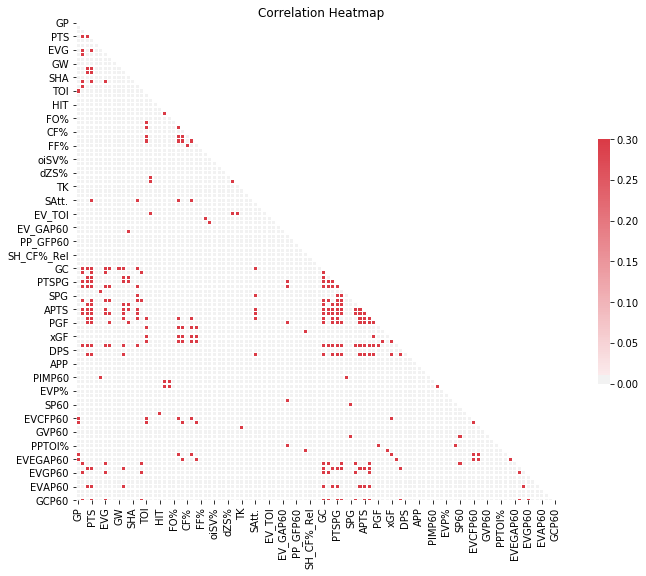

In [78]:
# Compute the correlation matrix
corr = df.corr()>.8

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap')
plt.show()

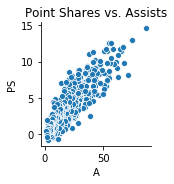

In [79]:
# Plot Point Shares vs. Assists
sns.pairplot(df, x_vars = ['A'], y_vars = ['PS'])
plt.title('Point Shares vs. Assists')
plt.show()

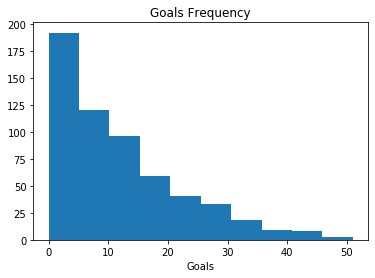

In [80]:
# Plot Goals Frequency Histogram
plt.hist(df['G'])
plt.xlabel('Goals')
plt.title('Goals Frequency')
plt.show()

Text(0.5, 1.0, 'GP60 Frequency')

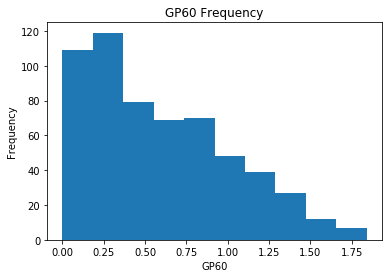

In [81]:
# Plot Goals Per 60 Histogram
plt.hist(df['GP60'])
plt.xlabel('GP60')
plt.ylabel('Frequency')
plt.title('GP60 Frequency')

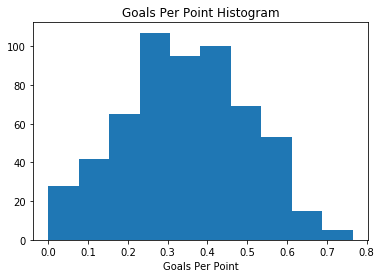

In [82]:
# Plot Goals Per Point Histogram
plt.hist(df['GPP'])
plt.xlabel('Goals Per Point')
plt.title('Goals Per Point Histogram')
plt.show()

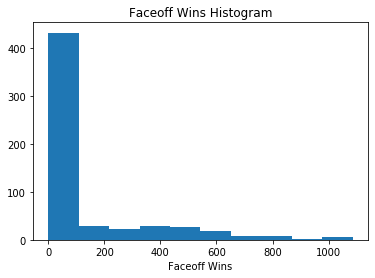

In [83]:
# Plot Faceoff Wins Histogram
plt.hist(df['FOW'])
plt.xlabel('Faceoff Wins')
plt.title('Faceoff Wins Histogram')
plt.show()

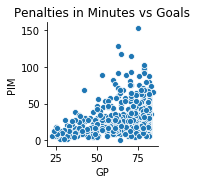

In [84]:
sns.pairplot(df, x_vars = ['GP'], y_vars = ['PIM'])
plt.title('Penalties in Minutes vs Goals')
plt.show()

In [85]:
df.corr()>.8

,GP,G,A,PTS,+/-,PIM,EVG,PPG,SHG,GW,EVA,PPA,SHA,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,CF,CA,CF%,FF,FA,FF%,FF% rel,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,E+/-,SAtt.,Thru%,Shift,EV_TOI,EV_CF%_Rel,EV_GFP60,EV_GAP60,PP_TOI,PP_CF%_Rel,PP_GFP60,PP_GAP60,SH_TOI,SH_CF%_Rel,SH_GFP60,SH_GAP60,GC,GPG,APG,PTSPG,GCPG,PIMPG,SPG,AG,AA,APTS,AGC,TGF,PGF,TGA,PGA,xGF,xGA,OPS,DPS,PS,GPP,APP,CFP60,CAP60,PIMP60,FOWP60,FOLP60,EVP%,SHP%,PPP%,SP60,BLKP60,HITP60,EVCFP60,EVCAP60,TKP60,GVP60,SATTP60,EVTOI%,PPTOI%,SHTOI%,EVEGFP60,EVEGAP60,GP60,AP60,EVGP60,SHGP60,PPGP60,EVAP60,SHAP60,PPAP60,GCP60,OPSP60,DPSP60
GP,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
G,False,True,False,True,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False
A,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,True,True,True,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
PTS,False,True,True,True,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,True,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False
+/-,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# Feature Selection

In [86]:
col_list = []
for col in df.columns:
    col_list.append(col)
print(col_list)

['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG', 'SHG', 'GW', 'EVA', 'PPA', 'SHA', 'S', 'S%', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)', 'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%', 'Shift', 'EV_TOI', 'EV_CF%_Rel', 'EV_GFP60', 'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60', 'SH_TOI', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG', 'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA', 'APTS', 'AGC', 'TGF', 'PGF', 'TGA', 'PGA', 'xGF', 'xGA', 'OPS', 'DPS', 'PS', 'GPP', 'APP', 'CFP60', 'CAP60', 'PIMP60', 'FOWP60', 'FOLP60', 'EVP%', 'SHP%', 'PPP%', 'SP60', 'BLKP60', 'HITP60', 'EVCFP60', 'EVCAP60', 'TKP60', 'GVP60', 'SATTP60', 'EVTOI%', 'PPTOI%', 'SHTOI%', 'EVEGFP60', 'EVEGAP60', 'GP60', 'AP60', 'EVGP60', 'SHGP60', 'PPGP60', 'EVAP60', 'SHAP60', 'PPAP60', 'GCP60', 'OPSP60', 'DPSP60']


In [87]:
# Columns to be removed for analysis only including playstyle
remove_columns = ['GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG', 'SHG', 'GW', 'EVA', 
                  'PPA', 'SHA', 'S', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'CF', 'CA', 
                  'CF%', 'FF', 'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'dZS%',
                  'TOI(EV)', 'TK', 'GV', 'E+/-', 'SAtt.', 'Shift', 'EV_TOI', 'EV_CF%_Rel', 'EV_GFP60',
                  'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60', 'SH_TOI', 'SH_CF%_Rel', 
                  'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG', 'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA',
                  'APTS', 'AGC', 'TGF', 'PGF', 'TGA', 'PGA', 'OPS', 'DPS', 'PS', 'xGF', 'xGA', 'GP60', 'AP60', 
                  'EVGP60', 'SHGP60', 'PPGP60', 'EVAP60', 'SHAP60', 'PPAP60', 'GCP60', 'OPSP60', 'DPSP60']
remove_df = df.drop(remove_columns, axis = 1)

In [88]:
# Columns to be removed for analysis involving both skill and playstyle
df_remove_columns = ['GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG', 'SHG', 'GW', 'EVA', 
                     'PPA', 'SHA', 'S', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'CF', 'CA', 'FF', 'FA', 'FF%',
                     'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'TOI(EV)', 'TK', 'GV', 'E+/-', 'SAtt.', 'EV_TOI', 
                     'PP_TOI', 'SH_TOI', 'GC', 'GPG', 'APG', 'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA', 'APTS', 
                     'AGC', 'TGF', 'PGF', 'TGA', 'PGA', 'xGF', 'xGA', 'OPS', 'DPS', 'PS']
df.drop(df_remove_columns, axis = 1, inplace = True)

In [89]:
remove_df.columns

Index(['Player', 'Pos', 'S%', 'FO%', 'oZS%', 'TOI/60', 'Thru%', 'GPP', 'APP',
       'CFP60', 'CAP60', 'PIMP60', 'FOWP60', 'FOLP60', 'EVP%', 'SHP%', 'PPP%',
       'SP60', 'BLKP60', 'HITP60', 'EVCFP60', 'EVCAP60', 'TKP60', 'GVP60',
       'SATTP60', 'EVTOI%', 'PPTOI%', 'SHTOI%', 'EVEGFP60', 'EVEGAP60'],
      dtype='object')

In [90]:
df.columns

Index(['Player', 'Pos', 'S%', 'FO%', 'CF%', 'oZS%', 'dZS%', 'TOI/60', 'Thru%',
       'Shift', 'EV_CF%_Rel', 'EV_GFP60', 'EV_GAP60', 'PP_CF%_Rel', 'PP_GFP60',
       'PP_GAP60', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GPP', 'APP', 'CFP60',
       'CAP60', 'PIMP60', 'FOWP60', 'FOLP60', 'EVP%', 'SHP%', 'PPP%', 'SP60',
       'BLKP60', 'HITP60', 'EVCFP60', 'EVCAP60', 'TKP60', 'GVP60', 'SATTP60',
       'EVTOI%', 'PPTOI%', 'SHTOI%', 'EVEGFP60', 'EVEGAP60', 'GP60', 'AP60',
       'EVGP60', 'SHGP60', 'PPGP60', 'EVAP60', 'SHAP60', 'PPAP60', 'GCP60',
       'OPSP60', 'DPSP60'],
      dtype='object')

## Examine Correlation Between Remaining Variables

In [91]:
for col1 in df.columns[2:]:
    for col2 in df.columns[2:]:
        if col1 != col2:
            if stats.pearsonr(df[col1], df[col2])[0] > .9:
                print((col1, col2))

('FOWP60', 'FOLP60')
('FOLP60', 'FOWP60')
('SP60', 'SATTP60')
('EVCFP60', 'EVEGFP60')
('EVCAP60', 'EVEGAP60')
('SATTP60', 'SP60')
('EVEGFP60', 'EVCFP60')
('EVEGAP60', 'EVCAP60')
('GP60', 'EVGP60')
('GP60', 'GCP60')
('EVGP60', 'GP60')
('GCP60', 'GP60')
('GCP60', 'OPSP60')
('OPSP60', 'GCP60')


## Examine Remaining Variables

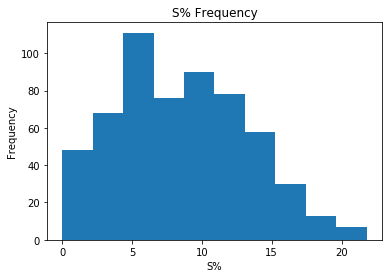

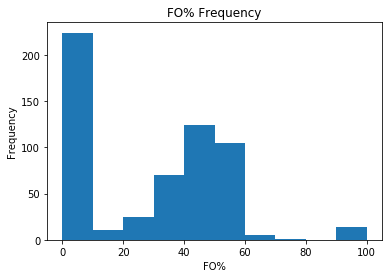

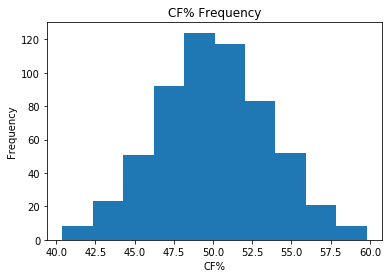

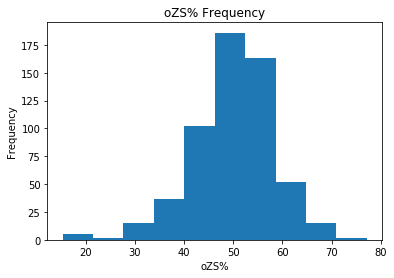

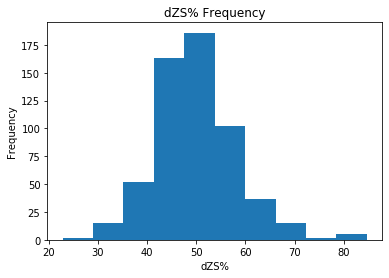

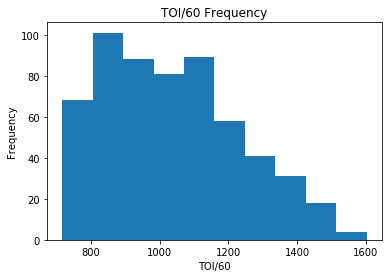

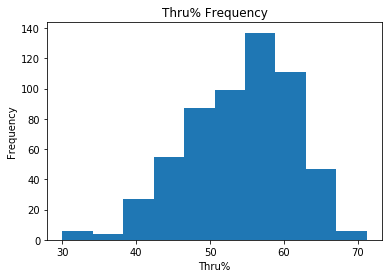

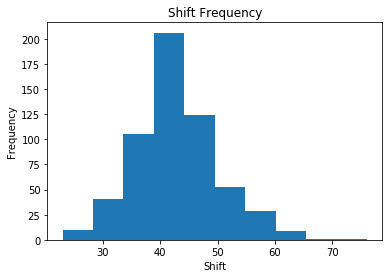

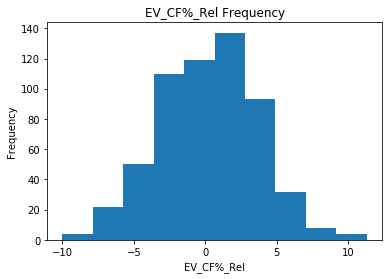

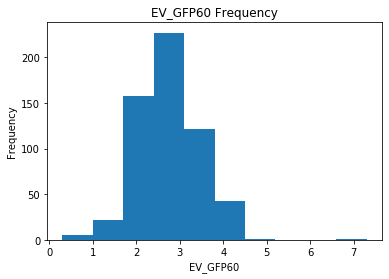

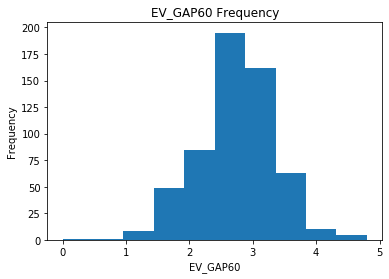

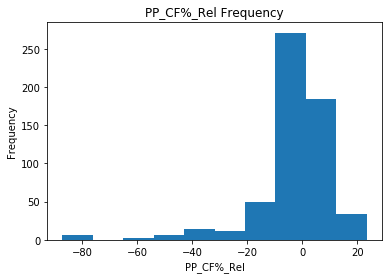

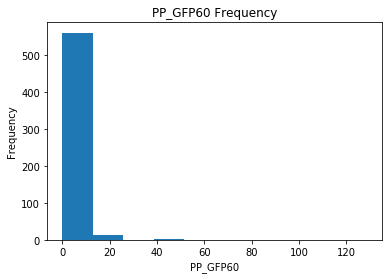

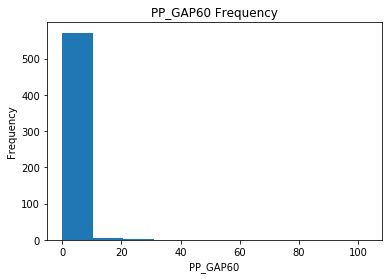

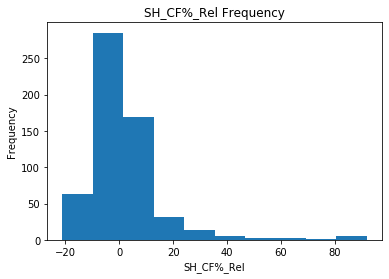

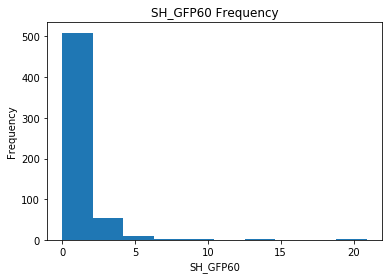

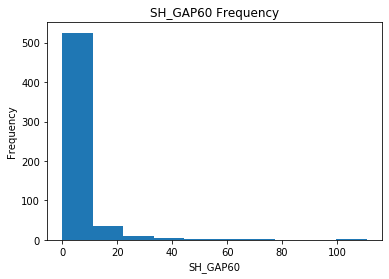

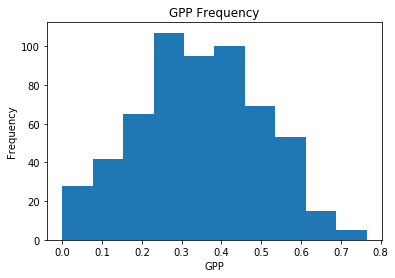

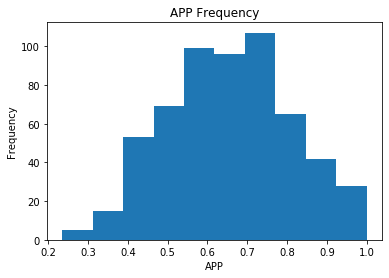

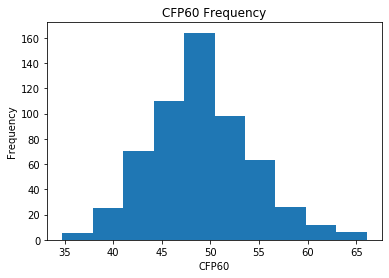

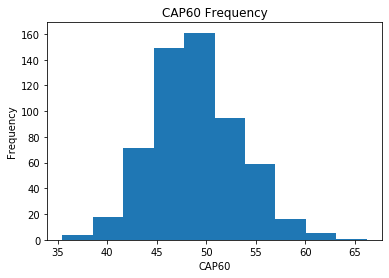

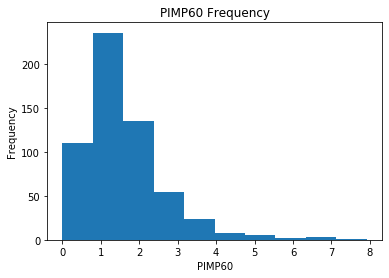

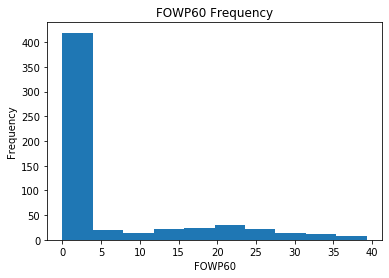

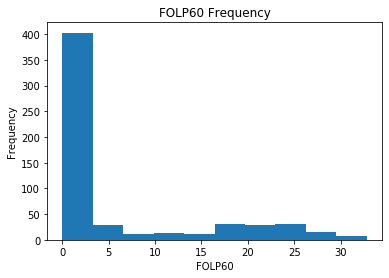

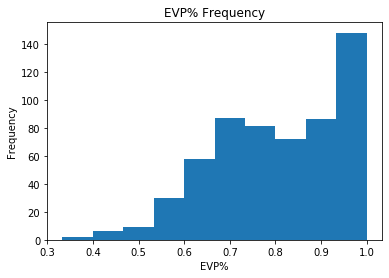

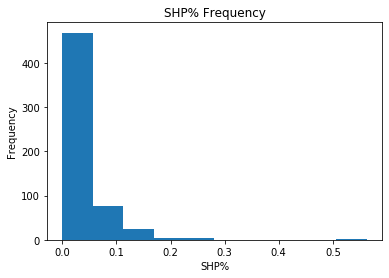

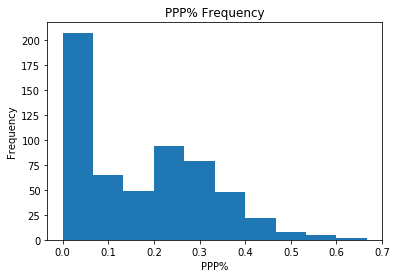

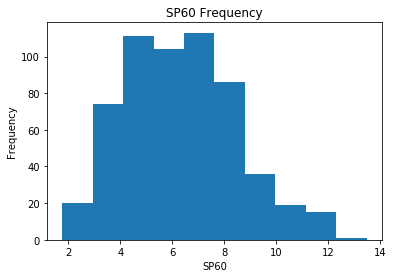

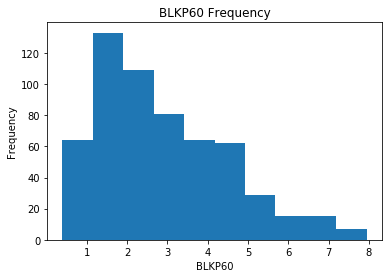

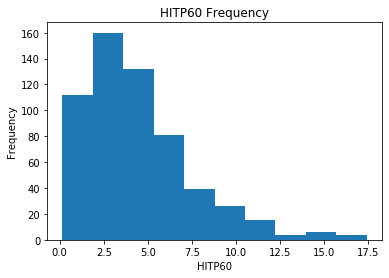

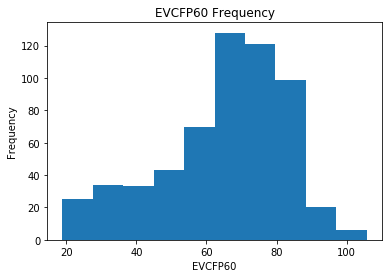

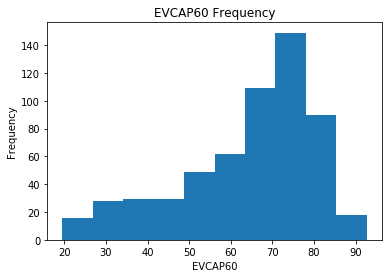

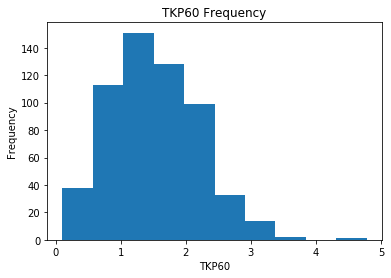

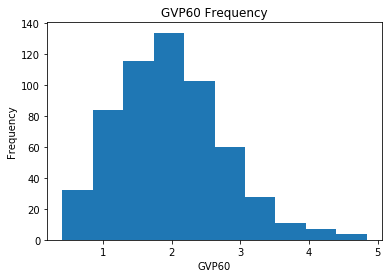

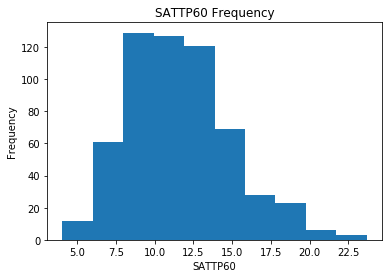

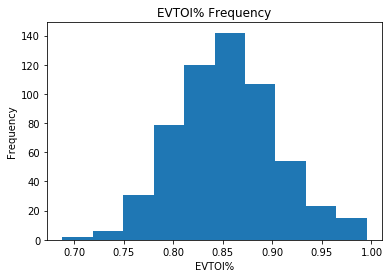

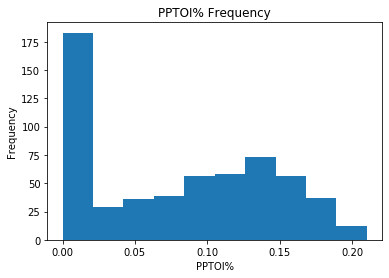

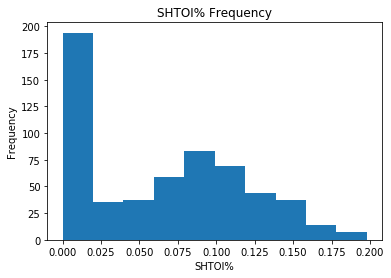

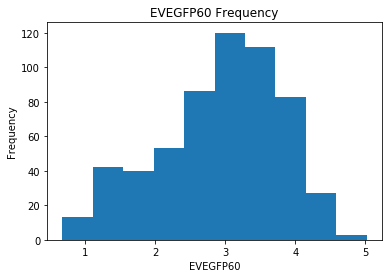

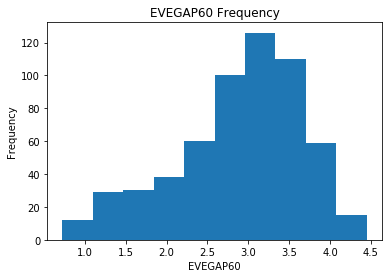

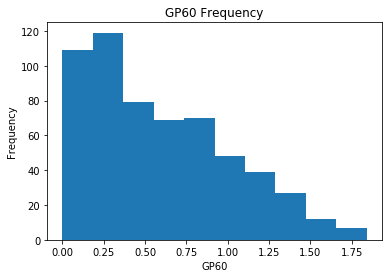

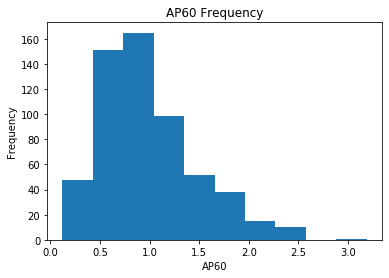

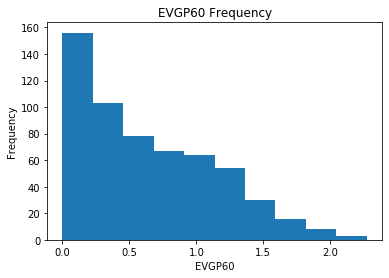

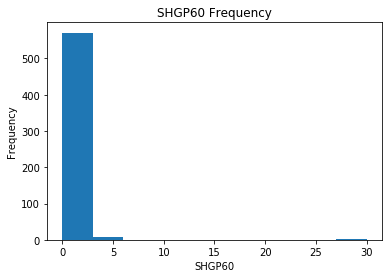

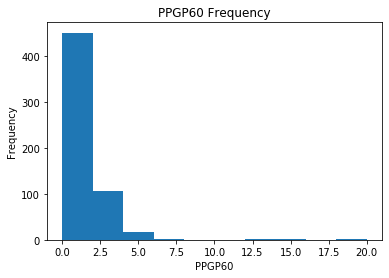

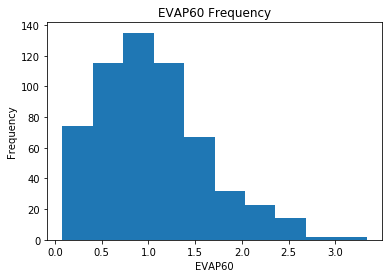

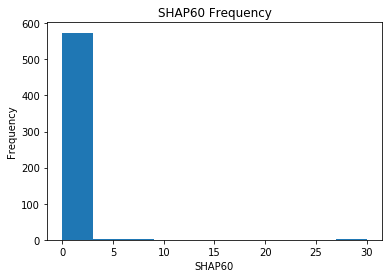

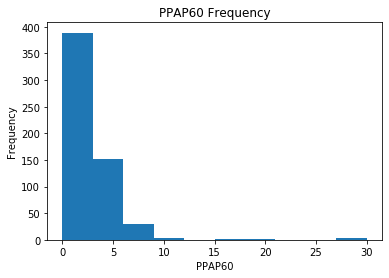

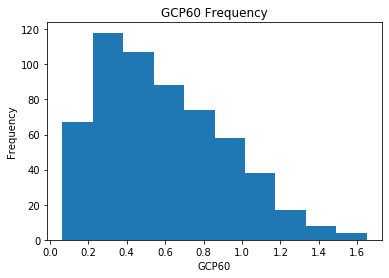

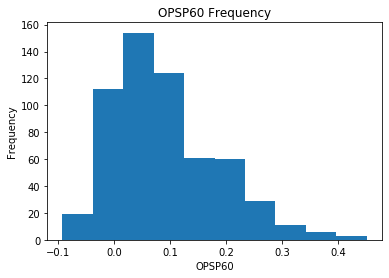

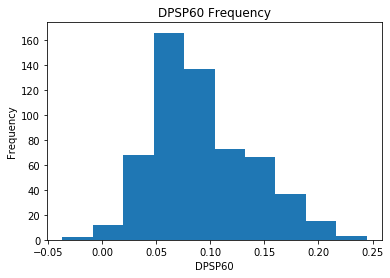

In [92]:
# Frequency Distributions for Remaining Variables
for var in df.columns[2:]:
    plt.hist(df[var])
    plt.title(var + ' Frequency')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

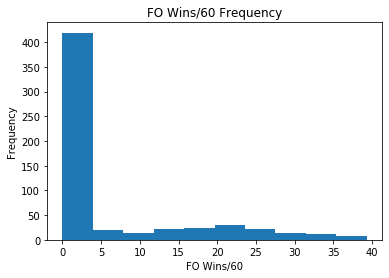

In [93]:
# Frequency Distribution for FO Wins Per 60
plt.hist(df['FOWP60'])
plt.title('FO Wins/60 Frequency')
plt.xlabel('FO Wins/60')
plt.ylabel('Frequency')
plt.show()

# Models 

## Removed skill features models

In [94]:
# Remove Identification Variables
X = remove_df.drop(['Player', 'Pos'], axis = 1)
X.columns

Index(['S%', 'FO%', 'oZS%', 'TOI/60', 'Thru%', 'GPP', 'APP', 'CFP60', 'CAP60',
       'PIMP60', 'FOWP60', 'FOLP60', 'EVP%', 'SHP%', 'PPP%', 'SP60', 'BLKP60',
       'HITP60', 'EVCFP60', 'EVCAP60', 'TKP60', 'GVP60', 'SATTP60', 'EVTOI%',
       'PPTOI%', 'SHTOI%', 'EVEGFP60', 'EVEGAP60'],
      dtype='object')

In [95]:
# Scale the Data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [96]:
# Determine Silhouette Score for K-Means Models of Various Cluster Numbers
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for num in num_clusters:
    # Fit the model and Print the Silhouette Score
    k_means = KMeans(n_clusters = num)
    k_means.fit(X_scaled)
    labels = k_means.labels_
    print(num, metrics.silhouette_score(X, labels, metric='euclidean'))

2 0.032545553128126924
3 -0.036832350984891675
4 -0.06819084448783506
5 0.00014933701744663234
6 -0.036131468420559976
7 -0.07079643012675817
8 -0.0644636980328331
9 -0.06257234722131032
10 -0.0907144059776036
11 -0.09995072541226399
12 -0.10163195347404988
13 -0.12059004349623768
14 -0.1139857206191439
15 -0.12539851386439846
16 -0.12740383377460135
17 -0.17631002329402026
18 -0.151590578789822
19 -0.15076646101152483
20 -0.17938580432421392


### 10 cluster KMeans Model

In [97]:
# Set number of clusters
n_clusters = 10

In [98]:
# Fit the Model
k_means = KMeans(n_clusters = n_clusters)
k_means.fit(X_scaled)

# Store Predictions in y_hat variable
y_hat = k_means.predict(X_scaled)
y_hat

array([5, 2, 5, 2, 2, 5, 2, 5, 2, 2, 5, 2, 5, 5, 5, 2, 5, 5, 2, 2, 2, 0,
       2, 2, 5, 5, 2, 2, 2, 2, 2, 5, 5, 5, 2, 5, 5, 0, 2, 2, 2, 5, 2, 2,
       2, 0, 5, 2, 2, 2, 0, 2, 2, 5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 2, 2, 5,
       5, 0, 2, 5, 2, 5, 0, 2, 5, 0, 5, 2, 0, 0, 5, 2, 5, 5, 5, 1, 2, 0,
       0, 5, 2, 5, 5, 2, 9, 5, 5, 0, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 5, 0,
       5, 5, 1, 2, 5, 8, 5, 5, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 6, 5, 5, 4,
       1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 8, 2, 0, 0, 0, 1, 6, 5, 5, 0, 2, 5,
       2, 2, 5, 5, 0, 9, 8, 0, 0, 2, 5, 2, 8, 1, 4, 8, 7, 5, 9, 5, 1, 1,
       5, 0, 2, 5, 9, 5, 2, 1, 4, 0, 1, 1, 1, 0, 5, 2, 5, 5, 5, 7, 1, 0,
       1, 9, 1, 1, 8, 9, 0, 1, 8, 0, 9, 2, 2, 4, 1, 2, 0, 1, 0, 1, 1, 1,
       0, 2, 2, 2, 5, 1, 1, 9, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 6, 9, 2,
       9, 9, 8, 0, 8, 0, 1, 8, 0, 0, 0, 9, 1, 8, 2, 0, 9, 0, 8, 0, 1, 9,
       1, 1, 0, 6, 4, 8, 8, 4, 0, 2, 2, 1, 8, 8, 0, 4, 1, 9, 1, 1, 0, 0,
       9, 2, 2, 0, 0, 6, 9, 8, 1, 0, 1, 1, 6, 1, 1,

In [99]:
# Add Predictions to DataFrame
remove_df['y_hat'] = y_hat

In [100]:
# Create a list of dataframes for each Category
df_list = []
for i in range(n_clusters):
    f'df_{i} = remove_df.loc[remove_df["y_hat"] == i]'
    df_list.append(remove_df.loc[remove_df["y_hat"] == i])

In [101]:
df_list[8]

,Player,Pos,S%,FO%,oZS%,TOI/60,Thru%,GPP,APP,CFP60,CAP60,PIMP60,FOWP60,FOLP60,EVP%,SHP%,PPP%,SP60,BLKP60,HITP60,EVCFP60,EVCAP60,TKP60,GVP60,SATTP60,EVTOI%,PPTOI%,SHTOI%,EVEGFP60,EVEGAP60,y_hat
115,Yanni Gourde,C,16.9,53.4,49.3,950,62.2,0.458333,0.541667,48.161010,44.988161,3.125493,7.150750,6.250987,0.770833,0.041667,0.187500,6.156275,1.420679,3.930545,80.289474,75.000000,2.367798,1.894238,9.897395,0.799790,0.088398,0.109445,3.931579,3.521053,8
142,Kasperi Kapanen,RW,11.5,55.6,55.1,997,53.5,0.454545,0.545455,58.148148,51.620370,1.250000,0.231481,0.185185,0.886364,0.045455,0.068182,8.055556,0.879630,4.259259,88.450704,78.521127,2.037037,1.759259,15.046296,0.854630,0.047145,0.096296,3.971831,3.746479,8
160,Zach Hyman,C,14.6,47.1,51.6,1036,59.9,0.512195,0.487805,59.951100,54.327628,3.178484,5.476773,6.161369,0.975610,0.024390,0.000000,7.041565,1.907090,4.987775,83.118644,75.322034,1.466993,1.369193,11.833741,0.853504,0.014466,0.131160,4.250847,3.586441,8
166,Alex Killorn,C,11.8,20.0,46.1,892,53.3,0.450000,0.550000,47.704918,40.278689,2.213115,0.098361,0.393443,0.825000,0.050000,0.125000,7.524590,1.131148,4.327869,83.982684,70.909091,1.475410,1.081967,14.114754,0.776311,0.091858,0.131066,4.017316,3.090909,8
169,Tom Wilson,RW,16.9,54.7,51.3,1089,56.8,0.550000,0.450000,48.293963,50.446194,6.719160,1.522310,1.259843,0.825000,0.050000,0.125000,6.824147,2.729659,10.498688,63.448276,66.275862,2.257218,2.309711,12.020997,0.799213,0.076247,0.123097,2.634483,3.220690,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Joakim Nordstrom,C,6.8,38.4,47.1,809,63.6,0.583333,0.416667,45.762712,46.398305,0.826271,3.050847,4.894068,1.000000,0.000000,0.000000,6.546610,3.305085,5.466102,61.450925,62.304410,1.652542,1.207627,10.296610,0.868821,0.007415,0.121116,2.270270,2.867710,8
516,Tyler Pitlick,C,10.7,41.7,29.3,803,60.5,0.666667,0.333333,46.168521,49.697933,0.572337,0.476948,0.667727,0.916667,0.000000,0.083333,7.154213,2.575517,8.871224,40.729313,43.842917,1.049285,1.526232,11.828299,0.887944,0.051060,0.059777,1.699860,1.969144,8
522,Trevor Lewis,C,3.4,46.0,47.2,841,64.9,0.250000,0.750000,51.345219,48.427877,0.875203,5.542950,6.515397,1.000000,0.000000,0.000000,8.460292,2.431118,5.153971,42.352941,39.946524,1.166937,1.166937,13.030794,0.889033,0.005943,0.102215,1.588235,1.724599,8
539,Chandler Stephenson,C,13.9,49.5,48.0,727,55.4,0.454545,0.545455,41.574194,50.787097,0.000000,3.638710,3.716129,0.909091,0.090909,0.000000,2.787097,2.554839,2.941935,51.967742,63.483871,1.393548,0.851613,5.032258,0.853333,0.000000,0.144516,2.041935,2.767742,8


In [102]:
df_list[9]

,Player,Pos,S%,FO%,oZS%,TOI/60,Thru%,GPP,APP,CFP60,CAP60,PIMP60,FOWP60,FOLP60,EVP%,SHP%,PPP%,SP60,BLKP60,HITP60,EVCFP60,EVCAP60,TKP60,GVP60,SATTP60,EVTOI%,PPTOI%,SHTOI%,EVEGFP60,EVEGAP60,y_hat
94,Phillip Danault,LW,9.1,55.5,44.7,1066,55.9,0.226415,0.773585,60.583333,46.333333,1.625000,36.750000,29.416667,0.886792,0.037736,0.075472,5.500000,2.500000,3.958333,98.354002,75.219842,2.041667,2.208333,9.833333,0.831562,0.026250,0.140625,4.187148,3.355130,9
159,Cody Eakin,C,18.3,51.0,50.8,922,57.4,0.536585,0.463415,48.300000,48.950000,0.800000,23.950000,23.050000,0.829268,0.073171,0.097561,6.000000,1.750000,4.400000,74.690722,75.695876,2.550000,1.700000,10.450000,0.840667,0.072583,0.085583,3.286082,3.572165,9
172,Anthony Cirelli,C,15.4,52.8,41.3,891,60.6,0.487179,0.512821,47.428102,40.870994,1.676253,24.749384,22.136401,0.820513,0.153846,0.025641,6.064092,2.415776,4.634347,81.295775,70.056338,2.267872,0.739523,10.008217,0.797316,0.019091,0.181923,4.047887,3.059155,9
180,Boone Jenner,C,9.4,54.1,34.2,1024,60.1,0.421053,0.578947,45.753425,49.132420,1.917808,28.584475,24.246575,0.894737,0.026316,0.078947,7.762557,3.196347,7.214612,71.571429,76.857143,1.917808,0.958904,12.922374,0.820396,0.092783,0.084970,3.578571,3.514286,9
199,Lars Eller,C,8.0,49.0,47.1,992,59.5,0.361111,0.638889,46.691561,44.092606,1.657954,24.331591,25.362211,0.833333,0.083333,0.083333,7.303958,2.106049,3.091860,80.775194,76.279070,2.643764,2.823002,12.277819,0.780358,0.077633,0.141150,3.744186,3.302326,9
203,Nick Bonino,C,14.4,51.8,30.4,978,58.4,0.485714,0.514286,41.741105,44.466313,0.817562,26.616200,24.799394,0.885714,0.028571,0.085714,5.359576,3.179410,1.090083,72.362205,77.086614,1.362604,1.816805,9.174868,0.778728,0.101173,0.118547,3.118110,3.346457,9
208,Jared McCann,C,12.7,46.2,47.5,872,62.5,0.542857,0.457143,48.243601,50.414828,1.641659,14.563107,16.946161,0.800000,0.114286,0.085714,7.943513,2.700794,4.077670,72.782956,76.058589,1.853486,2.330097,12.709620,0.861695,0.055075,0.080318,2.900133,3.251664,9
227,Casey Cizikas,C,18.0,49.1,33.2,841,65.3,0.606061,0.393939,41.367188,48.398438,2.109375,29.121094,30.234375,0.909091,0.090909,0.000000,6.503906,3.984375,7.558594,58.833333,68.833333,2.578125,1.992188,9.960938,0.855469,0.004753,0.137826,2.966667,2.625000,9
240,Mark Jankowski,C,14.1,52.0,51.5,762,51.0,0.437500,0.562500,46.912351,44.521912,0.717131,25.458167,23.545817,0.750000,0.250000,0.000000,5.916335,3.346614,1.792829,74.643423,70.839937,2.928287,2.151394,11.593625,0.827507,0.018360,0.150813,3.185420,2.957211,9
242,Scott Laughton,C,9.2,54.2,36.3,891,61.9,0.375000,0.625000,42.019704,53.399015,2.610837,16.945813,14.334975,0.937500,0.062500,0.000000,6.403941,2.266010,7.192118,68.605898,87.184987,2.068966,2.068966,10.344828,0.837055,0.010099,0.150356,3.321716,3.611260,9


In [103]:
# Create a dictionary with mean of each variable for each cluster
mean_dict = {}
for var in remove_df.columns[2:]:
    mean_dict[var] = [d[var].mean() for d in df_list]
print(mean_dict)

{'S%': [5.643076923076922, 10.733783783783784, 12.617721518987345, 3.5389830508474573, 3.7481927710843377, 12.526666666666666, 4.292307692307693, 9.170967741935483, 9.508196721311476, 10.494871794871795], 'FO%': [0.7692307692307693, 37.79189189189189, 50.50886075949367, 0.0, 0.24096385542168675, 38.976, 96.15384615384616, 25.180645161290318, 41.19836065573771, 51.3948717948718], 'oZS%': [51.7276923076923, 52.10675675675676, 52.93544303797468, 50.68644067796611, 46.91445783132531, 56.69866666666666, 49.93846153846153, 53.5258064516129, 44.165573770491804, 38.317948717948724], 'TOI/60': [1346.923076923077, 866.0540540540541, 1088.0506329113923, 944.9491525423729, 1142.0361445783133, 1081.4133333333334, 1191.5384615384614, 920.6774193548387, 853.7049180327868, 885.8717948717949], 'Thru%': [49.143076923076926, 58.80945945945947, 58.45696202531645, 45.28983050847458, 47.855421686746986, 57.46933333333333, 47.17692307692308, 52.77419354838709, 59.28032786885247, 59.917948717948725], 'GPP': [

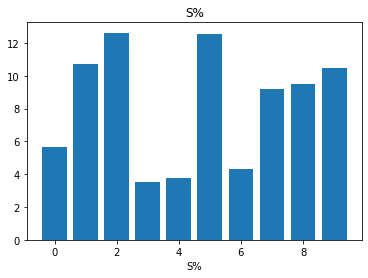

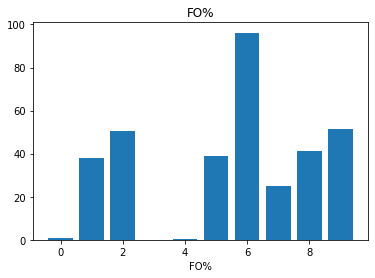

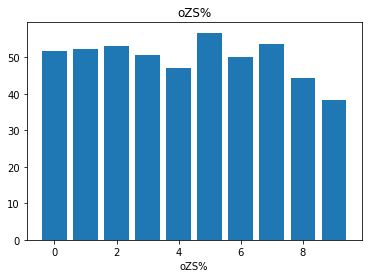

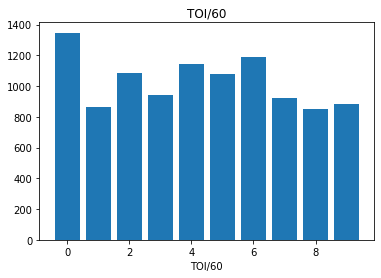

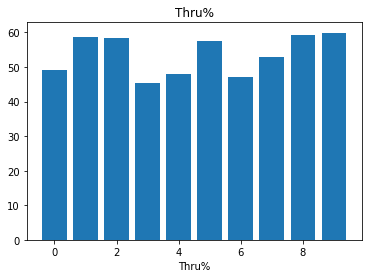

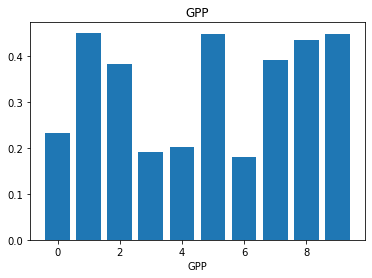

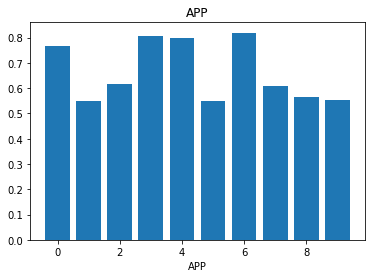

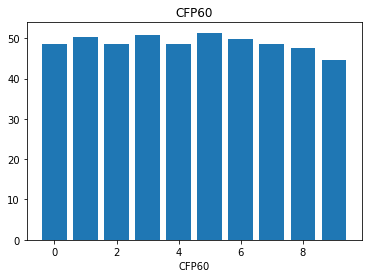

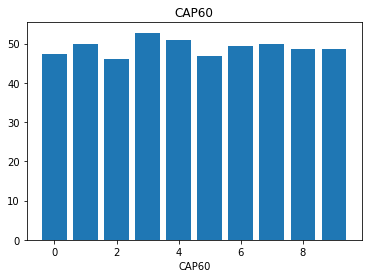

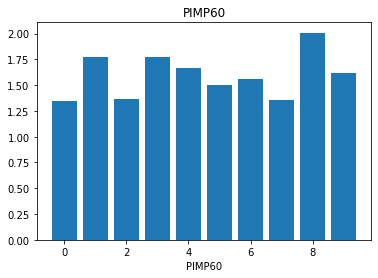

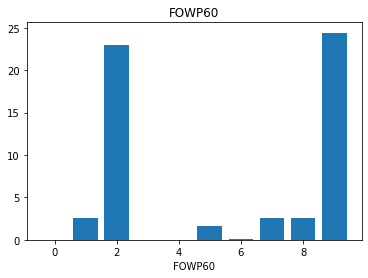

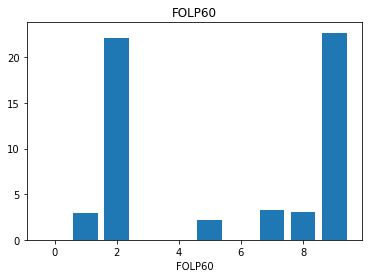

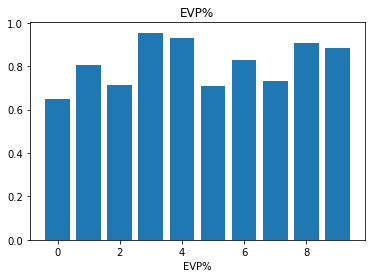

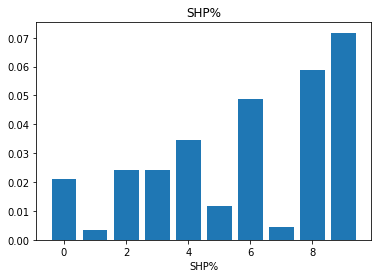

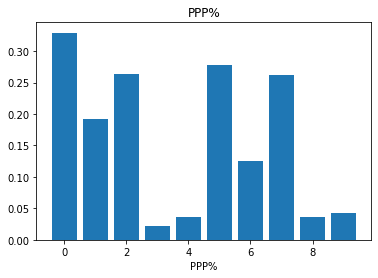

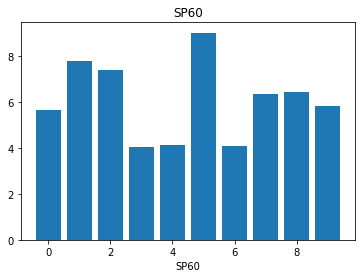

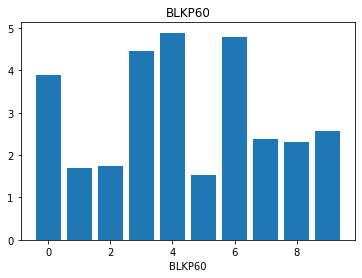

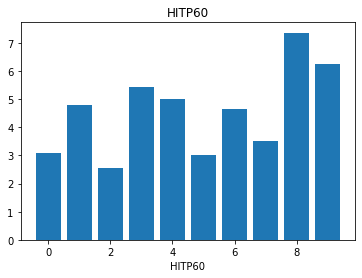

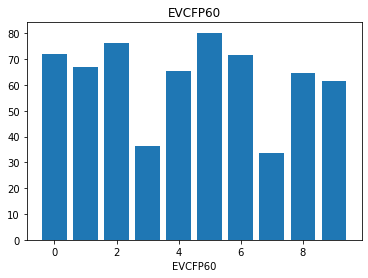

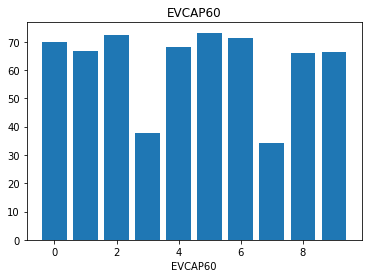

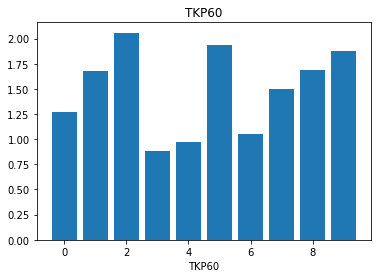

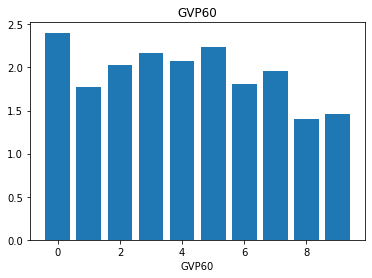

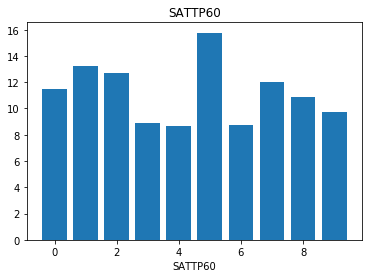

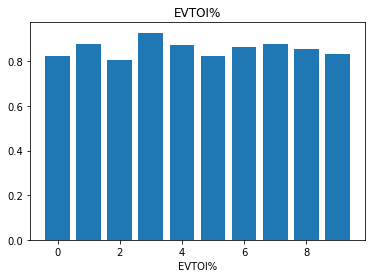

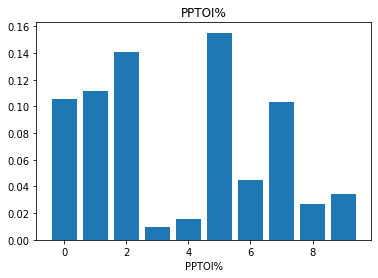

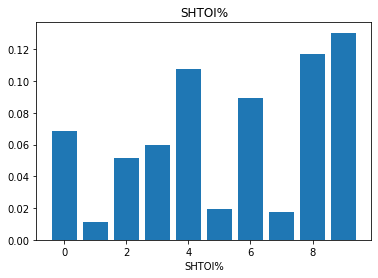

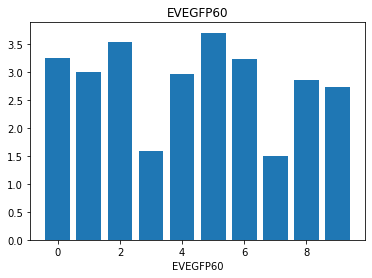

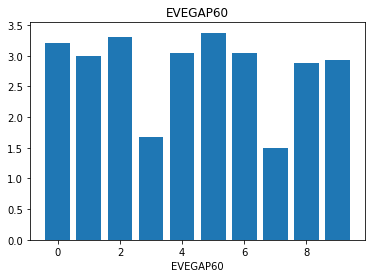

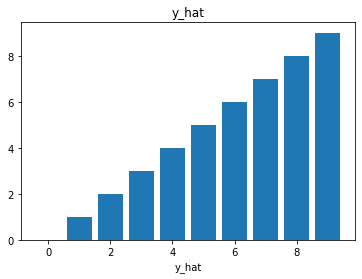

In [104]:
# Examine means of each variable to determine player categories
for key, value in mean_dict.items(): 
    plt.bar([i for i in range(len(df_list))], value)
    plt.title(key)
    plt.xlabel(key)
    plt.show()

Category Descriptions:

0: Power-Play specialists, good at getting pucks on net, don't take a lot of faceoffs although do okay when forced to, score goals

1: Minutes eaters, assist more than goal score, don't take a lot of penalties, no FO, mostly score on powerplay, block a decent number of shots, but not too physical, commit a lot of turnovers (defensemen)

2: Block a lot of shots, solid number of hits, not a lot of takeaways but lots of giveaways, not very many shots, play SH but not PP (defensemen), take lots of penalties, score most points EV

3: High FO, low minutes, score goals, score most points EV but high SH too, low PP, lowish shots, lots of hits, take care of the puck, play a lot of SH minutes

4: High FO, high shot %, more assists, weak offense but good defense advanced, don't take penalties, play both on PP and PK, not very physical, high takeaways/mediumish giveaways, 

5: High S%, high FO, big assists, solid offense and defense, don't play a lot short handed, score a good amount on powerplay, decent number of shots, low blocks and hits, high takeaways and high giveaways, decent number of shot attempts, lot of powerplay time

6: Score goals, lot of powerplay, a lot of shot attempts, not shorthanded, lots of scoring when they're on the ice

7: Poor shooting, high assist percentage, good offense bad defense, lot of even strength, good shot blockers, pretty physical, not a lot of takeaways, high turnovers, don't really play PP or PK (defenseman)

8: High PIM, lots of hits, lots of shorthanded

9: Goal scorers (comparatively speaking), LOTS of penalties, decent number of shots, fairly physical, play some powerplay but less SH

### 8 Clusters K-Means Model

In [105]:
# Set Number of Clusters
n_clusters = 8

In [106]:
# Fit Model
k_means = KMeans(n_clusters = n_clusters)
k_means.fit(X_scaled)

# Store predictions in y_hat variable
y_hat = k_means.predict(X_scaled)
y_hat

array([7, 2, 7, 2, 2, 7, 2, 7, 2, 2, 7, 2, 7, 7, 7, 2, 7, 7, 2, 2, 2, 3,
       2, 2, 7, 7, 2, 2, 2, 2, 2, 7, 7, 7, 2, 7, 2, 3, 2, 2, 2, 7, 2, 2,
       2, 3, 7, 2, 2, 2, 3, 2, 2, 7, 7, 7, 2, 7, 7, 2, 7, 7, 7, 2, 2, 7,
       2, 3, 2, 7, 2, 7, 3, 2, 7, 3, 7, 2, 3, 3, 7, 2, 7, 7, 7, 7, 2, 3,
       3, 7, 2, 7, 7, 2, 6, 7, 7, 3, 7, 7, 7, 7, 7, 7, 2, 7, 2, 7, 7, 3,
       7, 7, 7, 2, 7, 7, 7, 7, 2, 2, 2, 7, 7, 7, 7, 7, 2, 2, 3, 7, 7, 1,
       7, 0, 3, 3, 2, 3, 3, 7, 3, 3, 5, 2, 3, 3, 3, 7, 3, 7, 7, 3, 2, 7,
       2, 2, 7, 7, 3, 6, 5, 3, 3, 2, 7, 2, 5, 7, 1, 5, 0, 7, 6, 7, 7, 7,
       7, 3, 2, 7, 6, 7, 2, 7, 1, 3, 7, 7, 0, 3, 7, 2, 7, 7, 7, 0, 7, 3,
       7, 6, 7, 0, 5, 6, 3, 7, 5, 3, 6, 2, 2, 1, 7, 2, 3, 0, 3, 5, 0, 0,
       3, 2, 2, 2, 7, 7, 0, 6, 3, 3, 7, 0, 7, 0, 7, 3, 7, 2, 3, 3, 6, 2,
       6, 6, 5, 3, 5, 3, 0, 5, 3, 3, 3, 6, 7, 5, 2, 3, 6, 3, 5, 3, 7, 6,
       0, 7, 3, 5, 1, 5, 5, 1, 3, 2, 2, 7, 5, 5, 3, 1, 0, 6, 7, 0, 3, 3,
       6, 2, 2, 3, 3, 3, 6, 5, 0, 3, 7, 0, 3, 5, 0,

In [107]:
# Add Predictions to DataFrame
remove_df['y_hat'] = y_hat

In [108]:
# Create a list of dataframes for each Category
df_list = []
for i in range(n_clusters):
    f'df_{i} = remove_df.loc[remove_df["y_hat"] == i]'
    df_list.append(remove_df.loc[remove_df["y_hat"] == i])

In [109]:
# Create a dictionary with mean of each variable for each cluster
mean_dict = {}
for var in remove_df.columns[2:]:
    mean_dict[var] = [d[var].mean() for d in df_list]
print(mean_dict)

{'S%': [9.824528301886792, 3.5626373626373624, 12.67375, 5.6014285714285705, 4.341176470588236, 9.12537313432836, 10.4775, 12.455454545454545], 'FO%': [35.90377358490566, 3.5164835164835164, 50.317499999999995, 7.142857142857143, 4.680882352941175, 44.49850746268657, 51.18, 38.480909090909094], 'oZS%': [54.886792452830186, 46.4912087912088, 52.89000000000001, 51.85285714285714, 50.87352941176471, 45.0089552238806, 38.394999999999996, 54.749999999999986], 'TOI/60': [881.9433962264151, 1127.9120879120878, 1093.1375, 1344.557142857143, 935.5735294117648, 868.3582089552239, 886.3, 1015.3909090909091], 'Thru%': [56.36037735849057, 47.571428571428584, 58.698750000000004, 48.86142857142857, 46.43970588235294, 58.71194029850746, 59.972500000000004, 58.16363636363637], 'GPP': [0.4071364494834767, 0.19028337347241328, 0.38665156252646105, 0.22830108826607867, 0.22932794382038402, 0.4207533159720683, 0.4497512477994473, 0.46657019548583206], 'APP': [0.5928635505165233, 0.8097166265275868, 0.61334

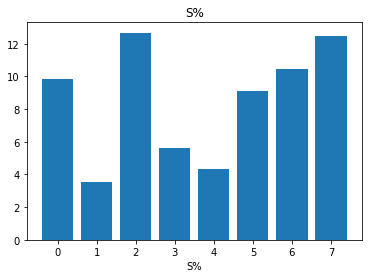

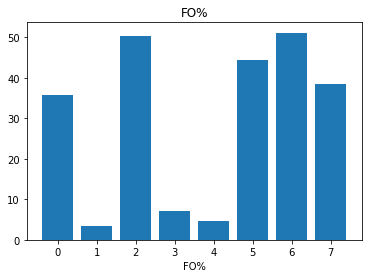

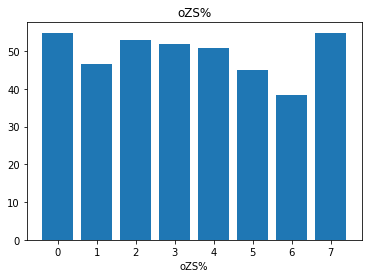

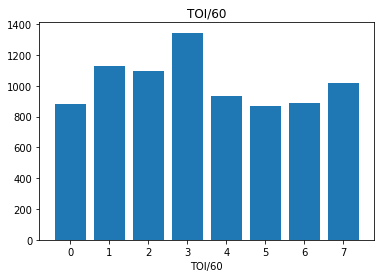

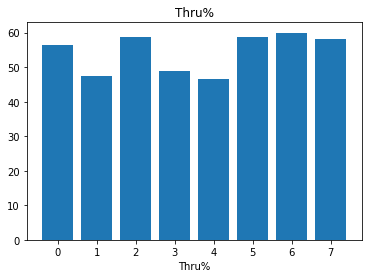

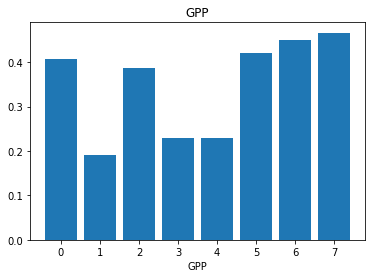

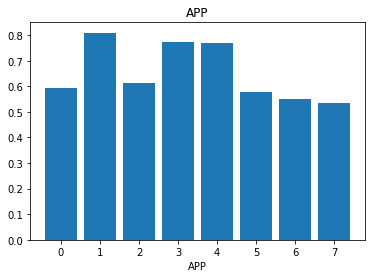

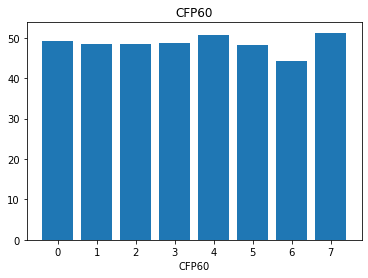

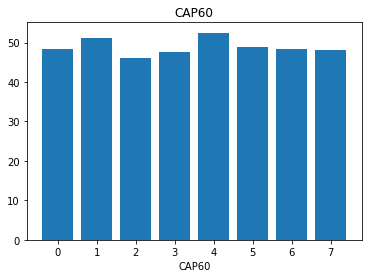

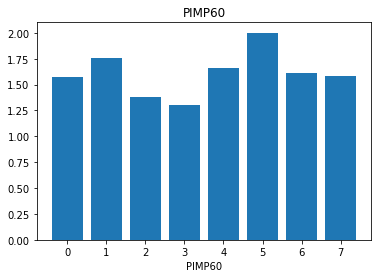

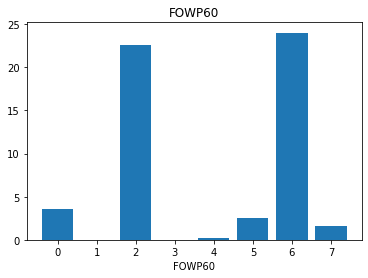

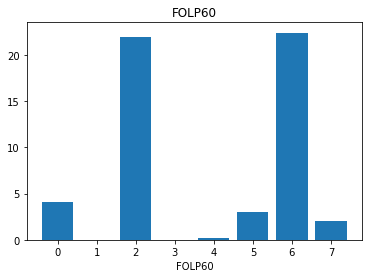

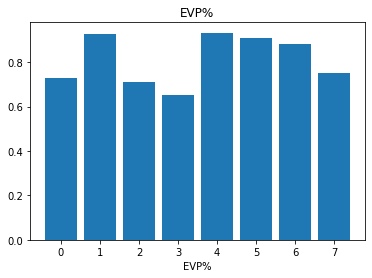

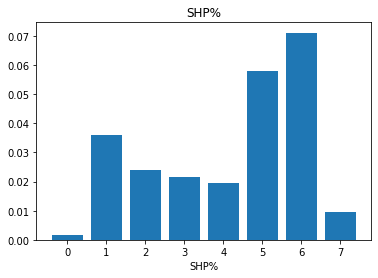

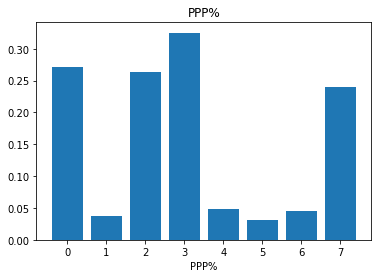

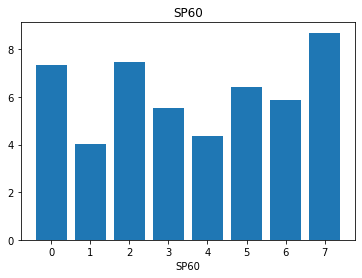

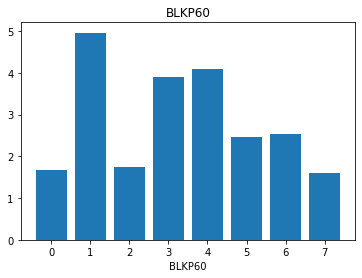

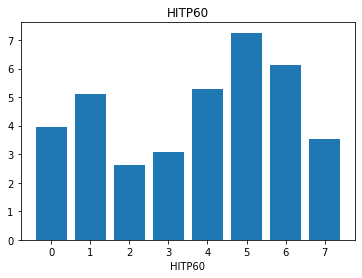

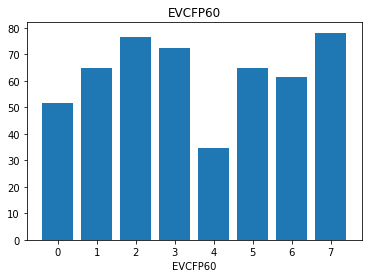

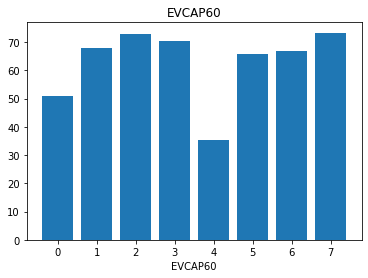

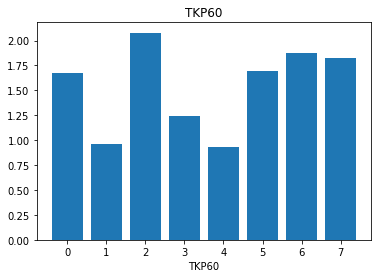

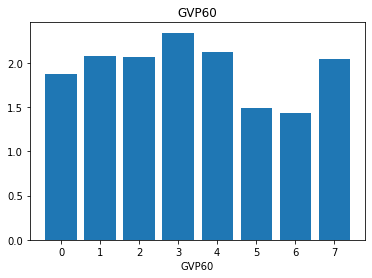

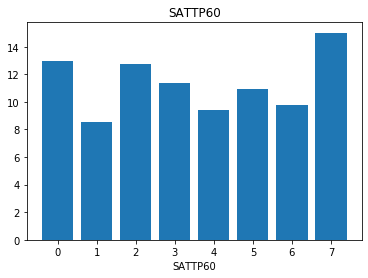

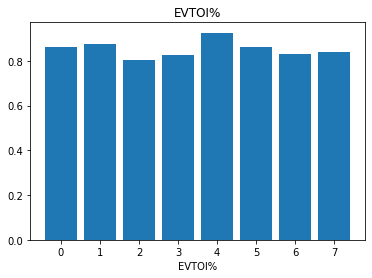

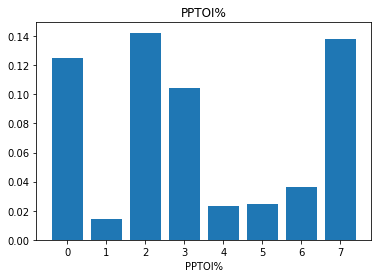

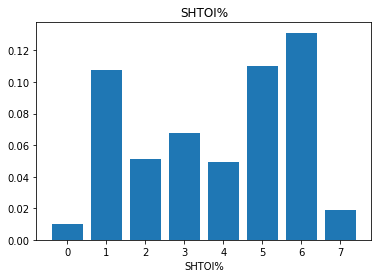

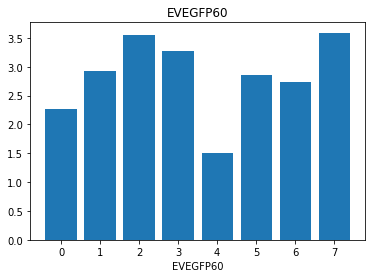

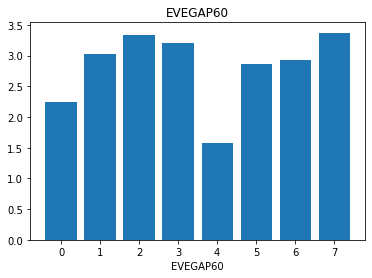

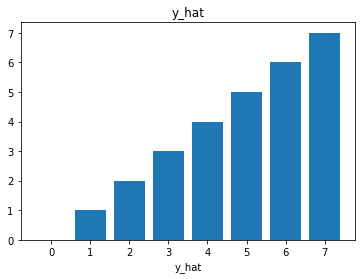

In [110]:
# Examine means of each variable to determine player categories
for key, value in mean_dict.items(): 
    plt.bar([i for i in range(len(df_list))], value)
    plt.title(key)
    plt.xlabel(key)
    plt.show()

Category Descriptions:

0: High Assists, Even Strength, moderately physical (defense)

1: Heavy hitters, shorthanded

2: Offensive PP/EV players, lots of penalties, 

3: good FO, more well-rounded skill players

4: Score high percentage of points on PP (defense)

5: low FO skill players (PP)

6: shot blocking, SH (defense)

7: SH specialist, take a lot of faceoffs

## Model Including Skill Features

In [111]:
# Remove Identification Variables
X = df.drop(['Player', 'Pos'], axis = 1)
X.columns

Index(['S%', 'FO%', 'CF%', 'oZS%', 'dZS%', 'TOI/60', 'Thru%', 'Shift',
       'EV_CF%_Rel', 'EV_GFP60', 'EV_GAP60', 'PP_CF%_Rel', 'PP_GFP60',
       'PP_GAP60', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GPP', 'APP', 'CFP60',
       'CAP60', 'PIMP60', 'FOWP60', 'FOLP60', 'EVP%', 'SHP%', 'PPP%', 'SP60',
       'BLKP60', 'HITP60', 'EVCFP60', 'EVCAP60', 'TKP60', 'GVP60', 'SATTP60',
       'EVTOI%', 'PPTOI%', 'SHTOI%', 'EVEGFP60', 'EVEGAP60', 'GP60', 'AP60',
       'EVGP60', 'SHGP60', 'PPGP60', 'EVAP60', 'SHAP60', 'PPAP60', 'GCP60',
       'OPSP60', 'DPSP60'],
      dtype='object')

In [112]:
# Scale the Data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [113]:
# Determine Silhouette Score for K-Means Models of Various Cluster Numbers
num_clusters = [i for i in range(2,100)]
for num in num_clusters:
    # Fit K-Means Model
    k_means = KMeans(n_clusters = num)
    k_means.fit(X_scaled)
    labels = k_means.labels_
    print(num, metrics.silhouette_score(X, labels, metric='euclidean'))

2 0.02965288310631415
3 0.021504700955144784
4 0.0389770735307863
5 -0.01662015038236375
6 -0.01821762069370303
7 -0.04876914827402506
8 -0.0578825352220326
9 -0.08074191718406122
10 -0.09617765122316455
11 -0.12849501689802545
12 -0.10765788412379163
13 -0.13397647905624216
14 -0.10558240989274373
15 -0.1466924294963986
16 -0.1639611212475748
17 -0.14760142360192968
18 -0.165735817144059
19 -0.16371418844793062
20 -0.14661892819777372
21 -0.18034004364618408
22 -0.17412935087931852
23 -0.19054933209549949
24 -0.19664693947702247
25 -0.18985168479206113
26 -0.1915034211490222
27 -0.18630684422391533
28 -0.21629021403557327
29 -0.19227746160408393
30 -0.21545726585812444
31 -0.19768279791408733
32 -0.20130329809683348
33 -0.2212616949117251
34 -0.20072871363367253
35 -0.26979542201621115
36 -0.22163578908659673
37 -0.24737976317766835
38 -0.2642942207655377
39 -0.22764570744870455
40 -0.22986465042043222
41 -0.22739826123297352
42 -0.2340153452537549
43 -0.28374458149505816
44 -0.252580

In [114]:
# Determine Silhouette Score for Agglomerative Models of Various Cluster Numbers
num_clusters = [i for i in range(2,100)]
for num in num_clusters:
    # Fit Agglomerative Models
    agg_clust = AgglomerativeClustering(n_clusters=num)
    agg_clust.fit(X_scaled)
    labels = agg_clust.labels_
    print(num, metrics.silhouette_score(X, labels, metric='euclidean'))

2 0.03061786923047974
3 -0.05254279994373646
4 0.012150291634674194
5 -0.039213372808011904
6 -0.0349936593885245
7 -0.047148140543175954
8 -0.04331366516469903
9 -0.07800514875885414
10 -0.10059057253849947
11 -0.10468084725207771
12 -0.09842625236132566
13 -0.1160849721608034
14 -0.15301909930097432
15 -0.15072818468348662
16 -0.16026963499522318
17 -0.177992127212344
18 -0.1779265700132039
19 -0.17213768841178517
20 -0.19180372495529888
21 -0.19630227926989266
22 -0.19699100980380416
23 -0.19748225228527722
24 -0.2065263014872737
25 -0.20594595229353516
26 -0.2017908227032704
27 -0.19884606045199696
28 -0.20231089669514304
29 -0.22027374190745483
30 -0.23221683308042462
31 -0.22763639046974904
32 -0.22495699645549047
33 -0.22781361971948733
34 -0.26355855237737563
35 -0.268257734584337
36 -0.26359109377091167
37 -0.26631516317132065
38 -0.26899674483816643
39 -0.269549952274909
40 -0.26883061100110067
41 -0.268512624780242
42 -0.26763117653105933
43 -0.2691755008847795
44 -0.2700483

### 20 Cluster K-Means Model

In [115]:
# Set Number of Clusters
n_clusters = 20

In [116]:
# Fit Model
k_means = KMeans(n_clusters = n_clusters)
k_means.fit(X_scaled)

# Store predictions in y_hat variable
y_hat = k_means.predict(X_scaled)
y_hat

array([16,  1, 16,  1,  1, 16,  1, 16,  1,  1, 16,  1, 16, 13, 16,  1, 16,
       16, 19,  1,  1,  0,  1,  1, 16, 16,  1,  1,  1,  1,  1, 16, 16, 17,
        1, 16,  1,  0,  1, 19,  1, 16, 19,  1,  1,  0, 16,  1, 19, 19,  0,
        1,  1, 16, 16, 16,  4, 16, 17,  1, 13, 13, 13, 19,  1, 16, 19,  0,
       19, 13,  1, 17,  0, 10, 17,  0, 17, 19,  0,  0, 13, 19, 16, 13, 17,
       13, 19,  0,  0, 13, 19, 13, 13,  4, 10, 17, 13,  0, 17, 17, 13, 17,
       17, 17, 19, 13, 19, 13, 16,  8, 13, 13, 17, 10, 17, 17, 17, 13, 19,
       10, 19, 17, 17, 17, 17, 17, 19, 19, 18, 17, 13,  8, 17, 13,  0,  0,
       10,  0,  0, 17,  8,  0, 17, 19,  0,  0,  0, 17, 18, 13, 13,  8, 19,
       17,  4, 19, 17, 13,  8,  4, 17,  0,  8,  4, 13,  4, 17, 17,  8, 17,
        7, 17, 10, 17,  5,  5, 13,  8, 10, 17, 10, 13, 10, 13, 14,  8,  5,
        5, 17,  8, 17,  4, 13, 18, 13, 15,  5,  0, 17, 10,  7, 13, 11, 10,
        0,  4, 11,  0,  4, 10,  4, 14,  5,  4,  8,  7, 14, 17,  7,  7,  8,
       19,  4, 10,  5,  5

In [117]:
# Add Predictions to DataFrame
df['y_hat'] = y_hat

In [118]:
# Create a list of dataframes for each Category
df_list = []
for i in range(n_clusters):
    f'df_{i} = df.loc[df["y_hat"] == i]'
    df_list.append(df.loc[df["y_hat"] == i])

In [119]:
# Create a dictionary with mean of each variable for each cluster
mean_dict = {}
for var in df.columns[2:]:
    mean_dict[var] = [d[var].mean() for d in df_list]
print(mean_dict)

{'S%': [5.953125, 15.431034482758617, 3.026530612244898, 3.6569230769230767, 12.104166666666666, 10.764516129032257, 9.0125, 8.5875, 5.342424242424242, 7.881818181818182, 9.794999999999998, 8.64, 10.885000000000002, 12.53225806451613, 4.353571428571429, 11.16, 14.46086956521739, 12.95897435897436, 4.75, 11.57391304347826], 'FO%': [1.5625, 51.39655172413793, 2.0408163265306123, 0.3076923076923077, 47.6, 34.33225806451613, 9.95625, 40.175, 0.0, 38.96818181818182, 52.55499999999999, 41.67111111111111, 52.33, 40.093548387096774, 1.7857142857142858, 45.559999999999995, 37.91304347826088, 37.187179487179485, 100.0, 49.68695652173914], 'CF%': [53.065625, 52.296551724137935, 48.963265306122445, 47.580000000000005, 47.475, 50.18709677419355, 48.756249999999994, 50.628125, 47.99393939393939, 48.0, 51.33, 49.05555555555556, 45.394999999999996, 48.958064516129035, 52.76071428571428, 54.9, 52.91304347826087, 53.446153846153834, 50.59166666666666, 52.73913043478261], 'oZS%': [55.421875, 54.948275862

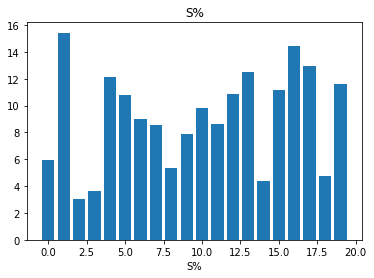

max:  1
min:  2


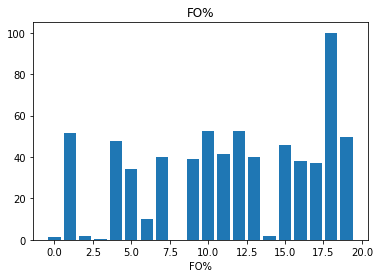

max:  18
min:  8


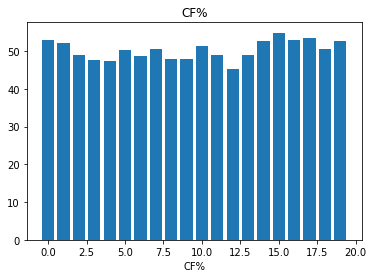

max:  15
min:  12


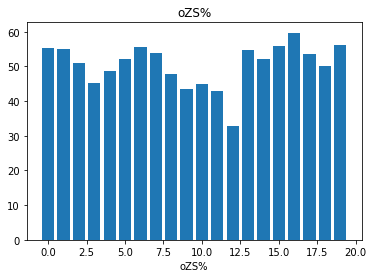

max:  16
min:  12


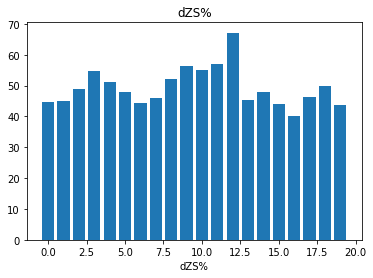

max:  12
min:  16


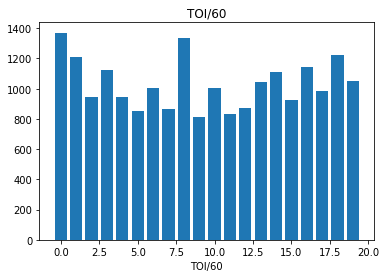

max:  0
min:  9


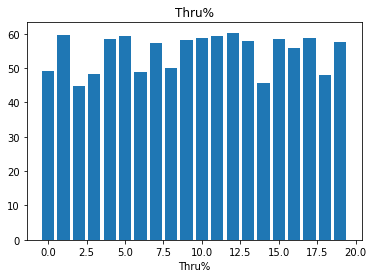

max:  12
min:  2


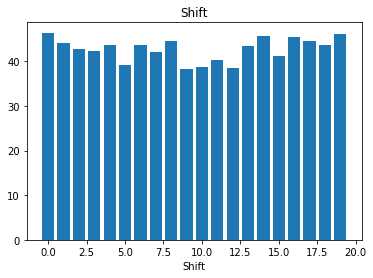

max:  0
min:  9


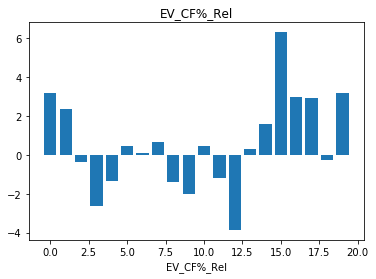

max:  15
min:  12


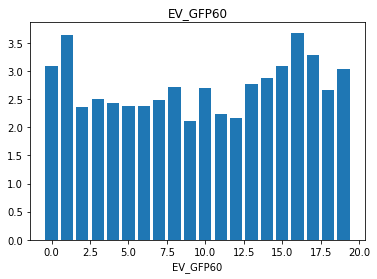

max:  16
min:  9


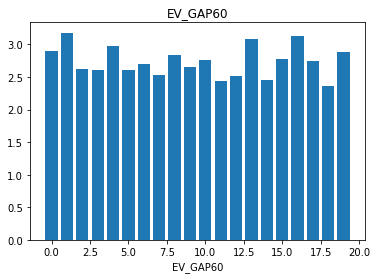

max:  1
min:  18


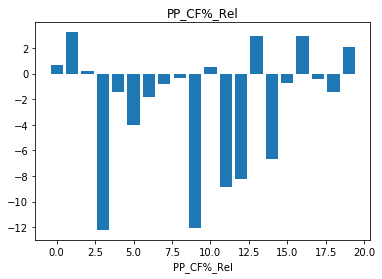

max:  1
min:  3


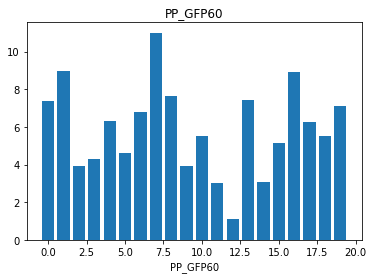

max:  7
min:  12


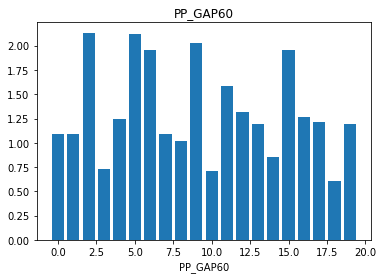

max:  2
min:  18


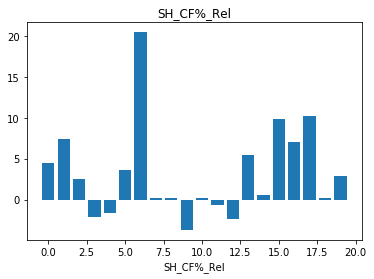

max:  6
min:  9


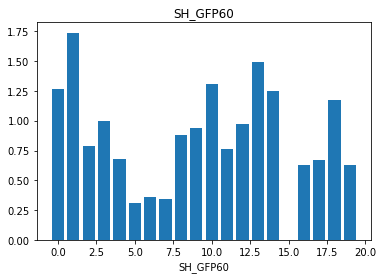

max:  1
min:  15


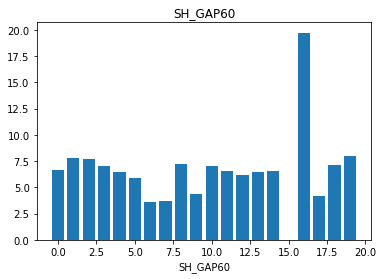

max:  16
min:  15


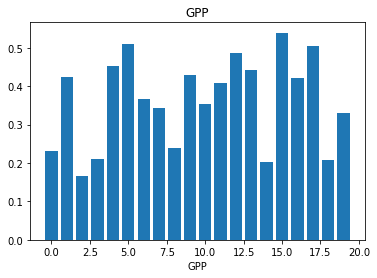

max:  15
min:  2


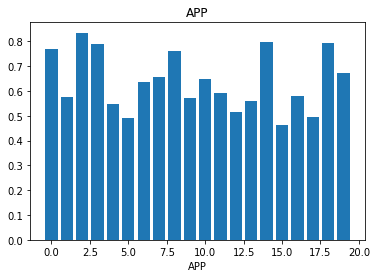

max:  2
min:  15


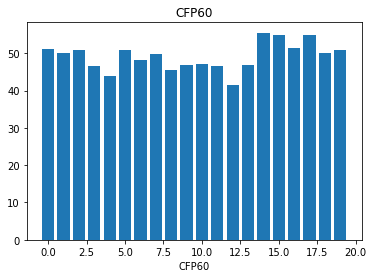

max:  14
min:  12


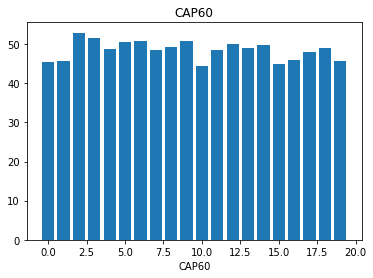

max:  2
min:  10


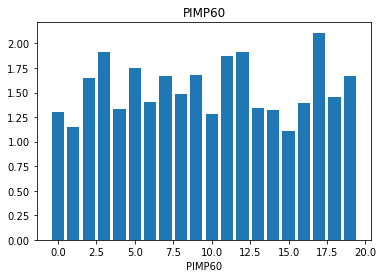

max:  17
min:  15


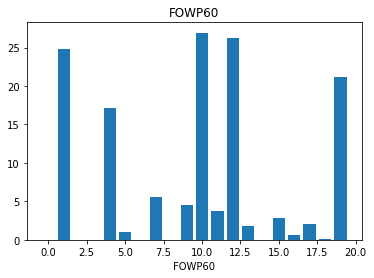

max:  10
min:  8


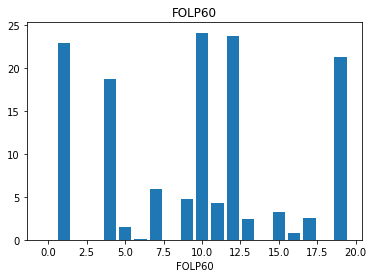

max:  10
min:  18


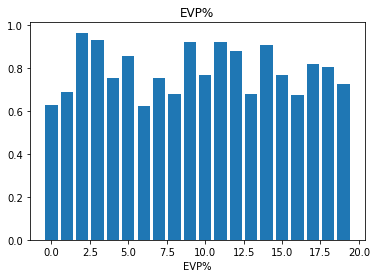

max:  2
min:  6


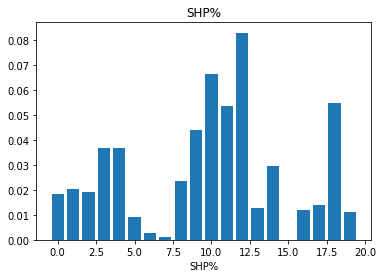

max:  12
min:  15


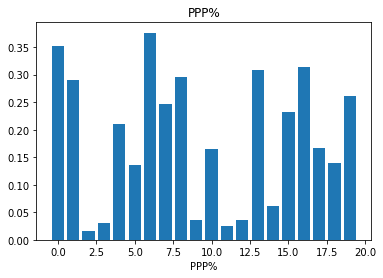

max:  6
min:  2


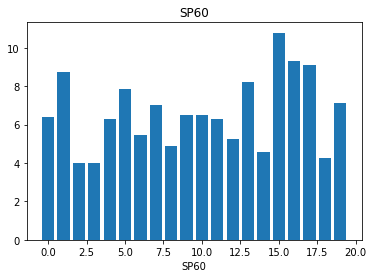

max:  15
min:  2


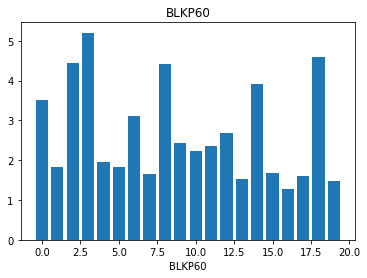

max:  3
min:  16


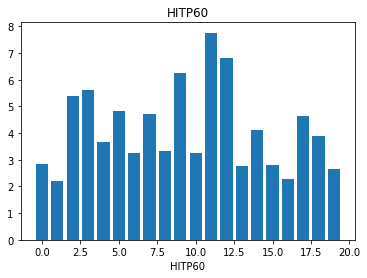

max:  11
min:  1


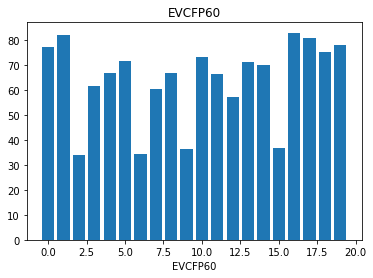

max:  16
min:  2


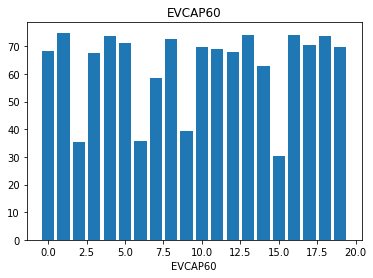

max:  1
min:  15


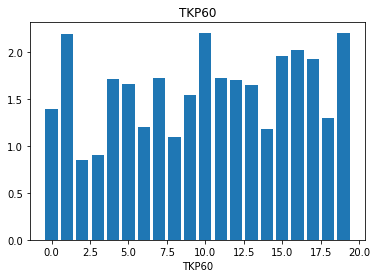

max:  10
min:  2


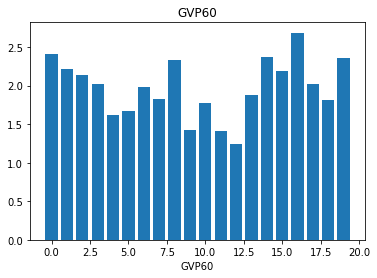

max:  16
min:  12


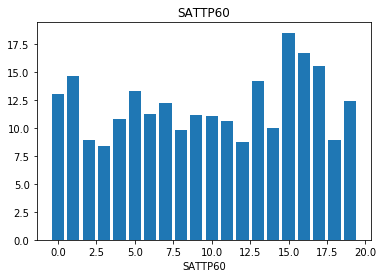

max:  15
min:  3


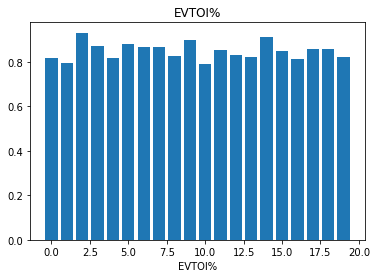

max:  2
min:  10


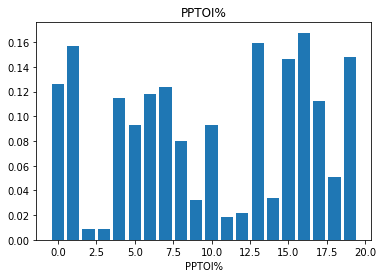

max:  16
min:  2


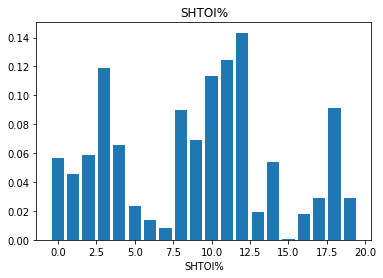

max:  12
min:  15


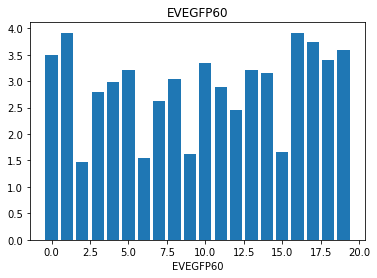

max:  1
min:  2


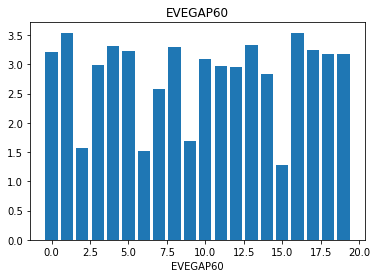

max:  16
min:  15


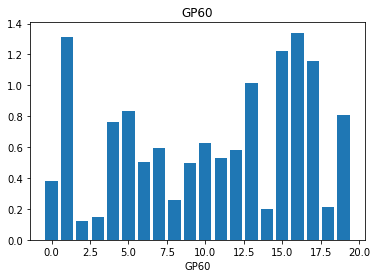

max:  16
min:  2


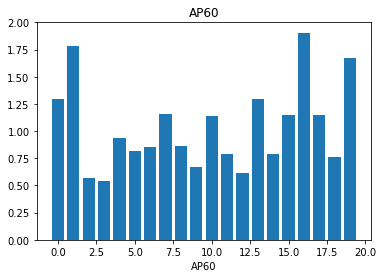

max:  16
min:  3


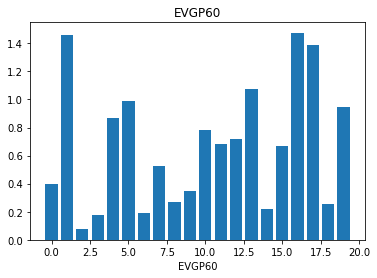

max:  16
min:  2


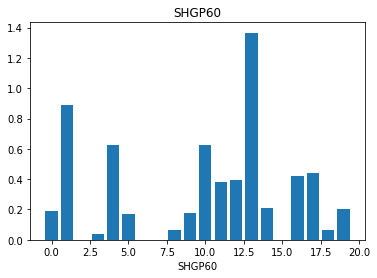

max:  13
min:  2


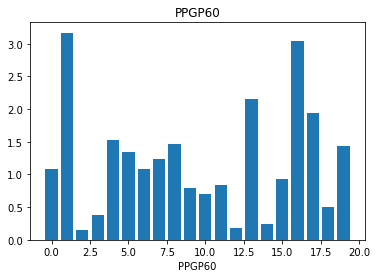

max:  1
min:  2


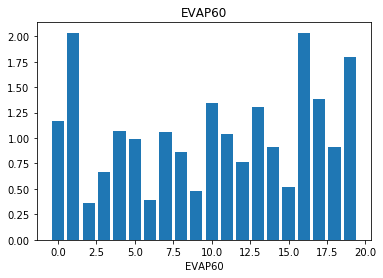

max:  16
min:  2


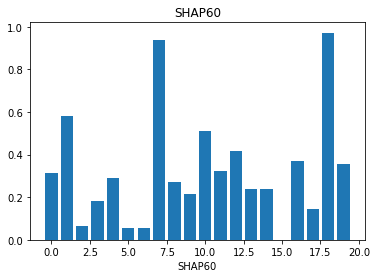

max:  18
min:  15


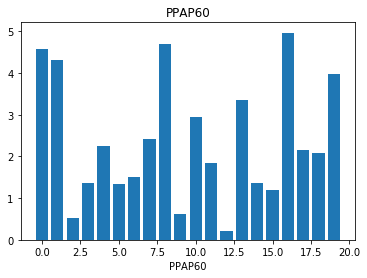

max:  16
min:  12


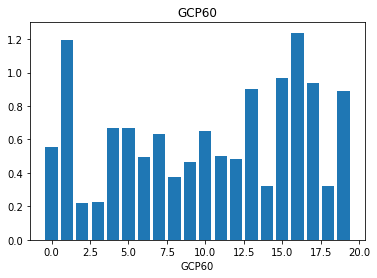

max:  16
min:  2


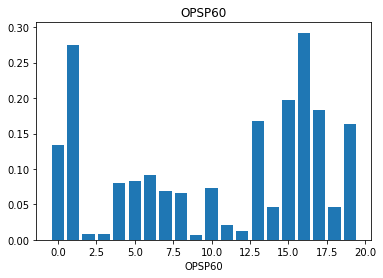

max:  16
min:  9


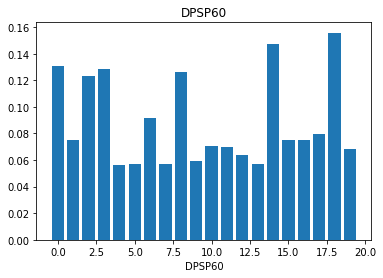

max:  18
min:  4


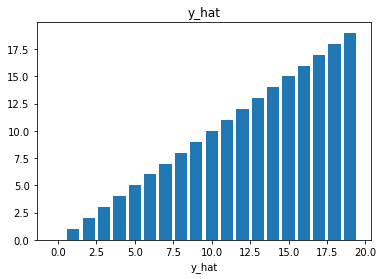

max:  19
min:  0


In [120]:
# Examine means of each variable to determine player categories
for key, value in mean_dict.items(): 
    plt.bar([i for i in range(len(df_list))], value)
    plt.title(key)
    plt.xlabel(key)
    plt.show()
    max_val_index = 0
    min_val_index = 0
    max_val = 0
    min_val = 1000000000
    for i, val in enumerate(value):
        if val > max_val:
            max_val = val
            max_val_index = i
        if val < min_val:
            min_val = val
            min_val_index = i
    print('max: ', max_val_index)
    print('min: ', min_val_index)

In [121]:
df_list[14]

,Player,Pos,S%,FO%,CF%,oZS%,dZS%,TOI/60,Thru%,Shift,EV_CF%_Rel,EV_GFP60,EV_GAP60,PP_CF%_Rel,PP_GFP60,PP_GAP60,SH_CF%_Rel,SH_GFP60,SH_GAP60,GPP,APP,CFP60,CAP60,PIMP60,FOWP60,FOLP60,EVP%,SHP%,PPP%,SP60,BLKP60,HITP60,EVCFP60,EVCAP60,TKP60,GVP60,SATTP60,EVTOI%,PPTOI%,SHTOI%,EVEGFP60,EVEGAP60,GP60,AP60,EVGP60,SHGP60,PPGP60,EVAP60,SHAP60,PPAP60,GCP60,OPSP60,DPSP60,y_hat
184,Jake Muzzin,D,6.4,0.0,51.9,45.1,54.9,1280,43.8,42,3.9,2.8,2.0,-0.6,3.2,2.1,-1.5,0.0,6.0,0.243243,0.756757,55.641476,51.599297,1.652021,0.000000,0.000000,0.837838,0.027027,0.135135,4.956063,4.710018,6.045694,86.032609,79.782609,0.702988,3.585237,11.318102,0.862332,0.054677,0.082015,3.679348,3.434783,0.316344,0.984183,0.434783,0.000000,0.857143,1.250000,0.571429,3.428571,0.456942,0.091388,0.186292,14
211,Travis Sanheim,D,7.4,0.0,49.5,47.6,52.4,1173,50.0,34,1.3,3.0,3.0,-10.6,4.3,2.2,3.1,0.0,8.0,0.257143,0.742857,52.107232,53.079800,0.822943,0.000000,0.000000,0.857143,0.000000,0.142857,4.526185,4.975062,1.683292,77.748837,79.200000,0.748130,2.431421,9.052369,0.915939,0.052826,0.029821,3.633488,3.421395,0.336658,0.972569,0.390698,0.000000,1.935484,1.283721,0.000000,2.903226,0.448878,0.089776,0.108479,14
216,T.J. Brodie,D,8.8,0.0,56.0,52.0,48.0,1288,43.8,42,3.3,3.3,2.3,5.3,4.6,1.5,4.0,2.8,7.9,0.264706,0.735294,52.959906,41.533019,0.849057,0.000000,0.035377,0.852941,0.029412,0.117647,3.608491,3.042453,0.742925,80.700809,63.288410,2.405660,3.537736,8.242925,0.864062,0.045804,0.089279,3.719677,2.970350,0.318396,0.884434,0.377358,0.521739,1.016949,1.185984,0.000000,3.050847,0.389151,0.077830,0.169811,14
228,Noah Hanifin,D,4.3,0.0,52.8,49.9,50.1,1246,47.7,44,-1.8,3.1,2.5,-3.1,4.0,0.7,6.4,2.2,8.0,0.151515,0.848485,53.465704,47.797834,0.433213,0.000000,0.000000,0.787879,0.060606,0.151515,4.187726,2.996390,3.140794,82.583643,73.828996,1.805054,3.140794,8.772563,0.863217,0.053751,0.081829,4.048327,3.529740,0.180505,1.010830,0.167286,0.588235,0.895522,1.282528,0.588235,3.582090,0.361011,0.061372,0.140794,14
239,Mikhail Sergachev,D,4.7,50.0,53.7,53.8,46.2,1075,47.4,53,3.0,3.1,2.5,-5.2,5.9,1.1,6.4,3.9,15.6,0.187500,0.812500,55.669643,47.946429,1.250000,0.044643,0.044643,0.812500,0.000000,0.187500,5.714286,4.151786,4.330357,77.134021,66.432990,0.803571,2.232143,12.053571,0.902158,0.083705,0.012091,3.476289,2.956701,0.267857,1.160714,0.371134,0.000000,0.000000,1.237113,0.000000,4.000000,0.446429,0.098214,0.133929,14
259,Jake Gardiner,D,3.8,0.0,52.2,50.4,49.6,1273,33.1,64,1.9,3.4,2.3,-6.8,4.9,2.0,12.8,0.0,0.0,0.100000,0.900000,59.908745,54.752852,1.186312,0.000000,0.045627,0.833333,0.000000,0.166667,3.558935,2.920152,2.783270,68.326106,62.445794,1.140684,2.418251,10.768061,0.906033,0.087224,0.005501,3.247181,2.617520,0.136882,1.231939,0.156114,0.000000,0.000000,1.144840,0.000000,2.702703,0.410646,0.077567,0.155133,14
271,Dmitry Orlov,D,3.0,0.0,48.3,48.2,51.8,1298,43.5,40,-1.2,2.8,2.7,-6.3,1.8,0.9,3.0,1.1,6.9,0.103448,0.896552,49.515220,52.931229,1.116122,0.000000,0.000000,0.965517,0.000000,0.034483,3.416009,3.483653,4.633596,75.334477,80.531732,1.792559,2.705750,7.846674,0.898271,0.036979,0.063172,3.061750,3.720412,0.101466,0.879369,0.154374,0.000000,0.000000,1.286449,0.000000,1.250000,0.304397,0.033822,0.101466,14
279,Charlie McAvoy,D,8.9,0.0,54.1,53.0,47.0,1330,50.6,42,1.0,3.7,2.8,-8.0,4.2,2.8,7.0,1.7,2.6,0.250000,0.750000,52.781955,44.711779,2.255639,0.000000,0.000000,0.892857,0.035714,0.071429,3.959900,4.561404,4.611529,54.606742,46.257563,1.503759,2.706767,7.819549,0.869925,0.070677,0.057895,2.509939,2.167675,0.350877,1.052632,0.311150,0.000000,0.638298,0.985307,0.779221,0.638298,0.451128,0.100251,0.185464,14
311,Mike Green,D,5.4,0.0,49.4,50.7,49.3,1301,52.9,37,1.5,3.0,2.9,6.9,3.6,1.4,-15.5,0.0,22.8,0.192308,0.807692,49.442060,50.600858,1.802575,0.000000,0.000000,0.884615,0.000000,0.115385,5.922747,3.605150,3.862661,39.317406,40.238908,1.030043,3.154506,11.201717,0.901216,0.089968,0.007690,1.919795,2.017065,0.321888,1.351931,0.255973,0.000000,0.000000,0.921502,0.000000,1.538462,

# Naming and Finalizing Final Clusters for 20 Cluster Model

In [122]:
# Name Clusters
cluster_dict = {0: 'Elite Offensive Defensemen', 1: 'Elite Offensive Players (Take FO)', 
                2: 'Even Strength Lower-Line Defensive Players', 3: 'PK Specialist And Shot-Blocking Defensemen',
                4: 'Every Situation Forwards', 5: 'Goal-Focused Lower-Line Players',
                6: 'Lower-Line PP Defensemen/Defensemen-Like Forwards', 7: 'Lower-Line Skill Players',
                8: 'Every Situation Defensemen', 9: 'Physical Defensive Lower-Line Forwards',
                10: 'Two-Way, FO-Taking Forwards', 11: 'Big Hitters And PK (No FO)',
                12: 'Big Hitters And PK (Take FO)', 13: 'Power-Play Specialists',
                14: 'Even Strength two-way defensemen', 15: 'Volume Shooters', 
                16: "Elite Offensive Players (Don't Take FO)", 17: 'Goal Scorers Who Take Penalties', 
                18: 'Strong Defensive Defensemen', 19: 'Well-Rounded Elite Playmakers (Take FO)'}

In [123]:
# Convert Cluster numbers to Names
def convert_cluster_number_to_cluster_name(row):
    return cluster_dict[row]
df['cluster_name'] = df['y_hat'].apply(lambda row: convert_cluster_number_to_cluster_name(row))